# 머신러닝을 통한 효율적인 동료 그룹 형성 및 가치평가

## 한양대 경제금융대학 석사 2기 이세준

### - Introduction

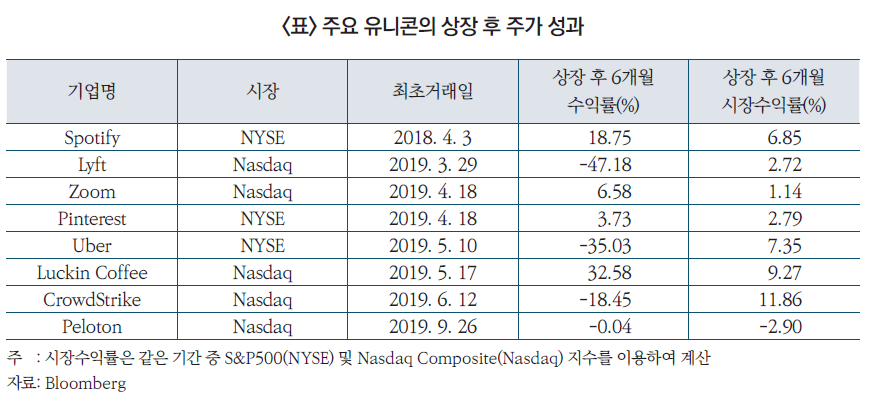 
출처 : 유니콘 기업가치 평가에 대한 논의와 시사점 (조성훈 2020, 자본시장연구원)

유니콘 이란, 기업가치가 10억달러 이상인 비공개 스타트업을 의미한다.<br> 
허나 조성훈(2020)은 스타트업 회사들은 정확한 가치평가에 어려움을 겪으며, 상장 이후에 퍼포먼스가 매우 떨어진다는 점을 지적하였다.<br>
이에 따라, 비단 스타트업 뿐만 아니라, 여러 회사들의 가치평가에 대한 중요성이 대두되며<br>
비슷한 동료 그룹 형성 및 CFFA (Strategically Comparable Firm-Finding Algorithm) 을 바탕으로 매출액 등의 평가를 직접 해 보고자 한다.

<ul>
    <li>미국 기업이 공시하는 10-K 보고서의 Item 1 Business description을 통하여 기업을 분류하고자 하였다. </li>
    <li>확보할 수 있는 10-K 보고서는 2,734개 기업의 보고서 였으나, 컴퓨터의 성능 및 시간 등으로 인하여 2,276개의 기업을 추출하였다. </li>
    <li>분류된 기업을 바탕으로 비슷한 기업 특성(성장성, 매출성) 등을 이용하여 가치를 평가하고자 하는 목표 기업의 매출액, 기업 가치 등을 추정하고자 하였다.</li>
    <li>허나, 선행연구와의 데이터 수 차이, 기한 등의 문제인지 완벽한 분류가 되지 않은 것으로 보인다.</li>
    <li>P/S ratio (매출액 대비 종가) 예측에서도 좋은 성능을 보인 기업이 존재하였으나 대체적으로 그렇지 않은 것 처럼 보였다.</li>
    <li>기업 분류 시, 혹은 기업가치 추정 시 현재의 데이터 셋에 더 맞출 수 있는 다른 방법이 필요한 것으로 사료된다.</li>
    <li>선행 연구와의 차별점을 위해 여러 방법을 시도하였으나, 결과가 좋지 않아서, 단순 선행 연구 두개를 합치는 것이 아닌 다른 방법을 찾아 보는것이 중요할 것 같으며<br>
    Spherical K-means clustering의 cluster 수에 대해서도 적합한 수준을 찾는 방법 고려등도 필요해 보인다.</li>
    
</ul>

### - Literature Review

<ol>
<b><li>SIC, NAICS에 대한 비판, 새로운 산업 분류 방법에 대한 연구들</li></b>
    미국 정부는 1937년에 SIC 를 통하여 기업들의 산업 분류를 시작하였으며, 이후 북미(North America) 기준으로 미국, 캐나다, 멕시코 산업을 기반으로 1997년 NAICS를 개발하였다. 이후 Standard and Poor’s and Morgan Stanley Capital International는 GICS를 개발하였으며, 이는 financial analysts들이 재정적으로 비교 가능한 회사들을 기준으로 결정할 수 있도록 설계되었다. 학계에서는 Fama and French(1997) 이 Fama-French(FF) 산업 분류라고 하여 기존 SIC를 재 분류하여 5~49까지의 범위로 나누었다. <br>
    하지만 SIC, NAICS, GICS 등등은 한계점이 존재한다. 현대 경제가 빠르게 변화함에 따라 기업은 그 어느때보다 빠르고 쉽게 산업에 진입하거나 퇴출할 수 있고, 새로운 산업역시 더 빠른속도로 등장하고 성장하게 된다. 이러한 상황에서 기존의 산업 분류 등은 manager 가 그들의 산업 영역 등을 결정하거나, 그들의 전략적인 투자 등의 방향성에 방해가 되게 된다. Information System 분야의 빠른 발전으로 인해, 연구자들은 많은 양의 빅데이터 기반 컴퓨팅을 통하여 산업을 분류하고자 한다. Fang et al.(2013)은 기존의 SIC, NAICS는 회사 간의 산업 유사성을 가정하지 않아 정확하지 않다고 비판을 하였으며, Chowdhuri et al.(2014) 는 서로 다른 XBRL(eXtensible Business Reporting Language) 을 기반으로 서로의 유사성을 이용하며, Yang et al.(2019)는 그래프 유사도를 활용하여 spectral clustering algorithim과 결합하여 분류하였고. Xu et al.(2020) 노동을 LinkedIn 프로파일의 데이터 세트를 이용하여 산업분류를 하였다.  
<b><li>텍스트 마이닝을 통한 산업 분류</li></b>
    Hoberg and Phillips(2010) 은 텍스트 마이닝을 기반으로 10-K 보고서에서 제품 설명이 유사한 기업을 합병하는 경우 더 성공적인 결과를 경험한다는 것을 보였으며, Hanley and Hoberg(2010) 은 IPO 가격이론을 SEC Edgar 웹사이트 전망 공시를 검토하기 위해 유사성 측정을 통하여 활용하였다. Hoberg and Phillips(2016)은 기업의 10-K 보고서의 business description을 바탕으로 도출된 텍스트 기반 네트워크 산업 분류(TNIC)를 개발하였고, 코사인 유사도를 바탕으로 기업의 busniess description이 다른 기업들과 비교되는 정도를 파악하여 300개 산업을 바탕으로 피어 기업을 rival/competitor 로 구분하였다. 허나 Kim et al.(2022)는 One-dimensional 로 비교하는 것은 저체 산업의 근접성과 관계를 추론할 수 없다고 지적하였으며, 텍스트 분석에서 발생하는 고차원성의 문제를 해결하기 위하여, Radovanovic et al.(2010)의 말과 같이 단순 고차원 벡터로부터 코사인 유사도 측정은 high dimension 문제가 발생하기 때문에, Baldi and Hornik(1989)에 의해 처음 도입된 심층 신경망 기반 차원성 감소 기법인 autoencoder 를 활용하여 새로운 산업분류를 하였고, TNIC 에 비해 성능이 개선되었음을 밝혔다.
<b><li>비교 가능 회사를 사용한 가치 추정</li></b>
    Comparalbe Company Analysis (CCA)는 유사한 산업이나 시장에서 경쟁하고 있는 다른 회사들과 비교하여 특정 회사 (target firm) 의 가치를 평가하는 방법이다. 분석가는 target firm 과 유사한 사업 모델, 시장 규모, 성장 전망 등을 가진 회사들을 선정하고, 주당 수익(EPS), 주가수익비율(P/E), 기업가치 대비 EBITDA 비율 등과 같은 재무지표를 사용하여, 처음에 선정한 유사 회사들의 평균 또는 중앙값을 통하여 target firm 의 재무지표를 추정한다. Bowman and Bush (2007)은 CCA를 바탕으로 규모가 유사한 경우 정확한 시장 베타 추정치를 제공한다는 것을 확인하였으며, 영업 레버리지와 배당금 지급 비율등을 제어해야 한다고 강조하였다. Stulman (2020) 은 전체 산업이 과대평가되거나 과소평가된다면 정확하지 않을 수 있으며, 회계 정책과 비교가능한 회사 자체를 기반으로 배수를 조작하는 것이 쉬울 수 있다고 언급하였다. 
</ol>

<ol>
    다음의 두 가지 대표 논문을 바탕으로 분석을 진행해 보고자 한다.<br>
    <b>1. An artificial intelligence-enabled industry classification and its interpretation (Kim et al. 2022)</b> <br>
    SEC Edgar 를 통해 2013~2016의 3,640 firm, 14,560 표본 수를 구성하였다.
    10-K business description 에서 businesses and products 설명 시 유사한 단어를 사용할 것으로 예상하였고, 구별할 수 있는 특징을 추출하여 <br>
    텍스트 기반 기계학습을 통하여 산업을 분류하였다. 빈도수가 높은 상위 2000개의 unique words 를 기반으로 전체 word vector를 형성하였으며 <br>
    아래의 그림과 같이 각 firm 의 빈도 2000개 단어에 word vector 가 존재하는 경우 1, word vector 가 존재하지 않는 경우 0으로 binary vector V를 형성하였다. <br>
    이후 생성된 binary vector 는 2000-length 이므로 high dimension 문제가 존재하기에, Autoencoder 를 통하여 dimension을(2000-500-125-10-125-500-2000) 축소 후 회복 하는 작업을 거친 후 <br>
    Spherical k-means clustering을 통하여 코사인 유사도가 높은 기업들로 300개의 산업을 분류하였다.

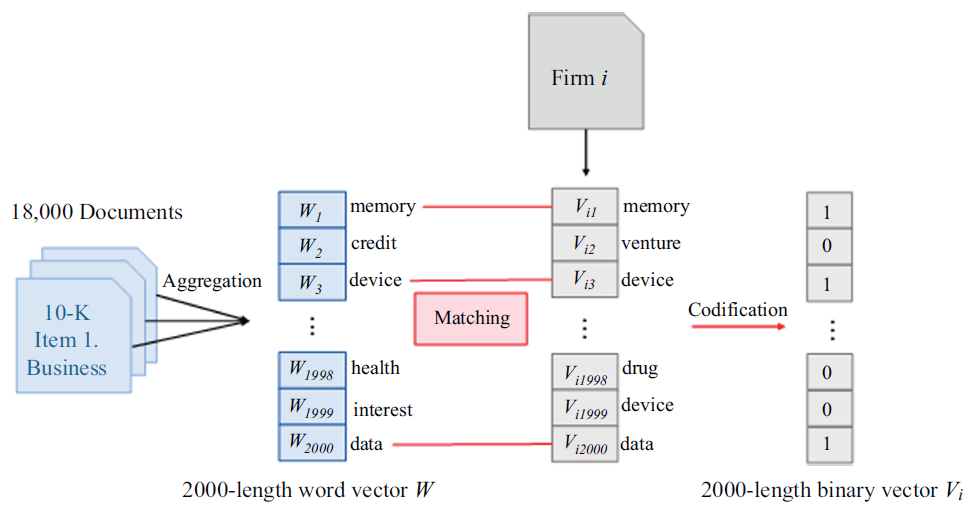

<table>
    <tr>
        <td>
            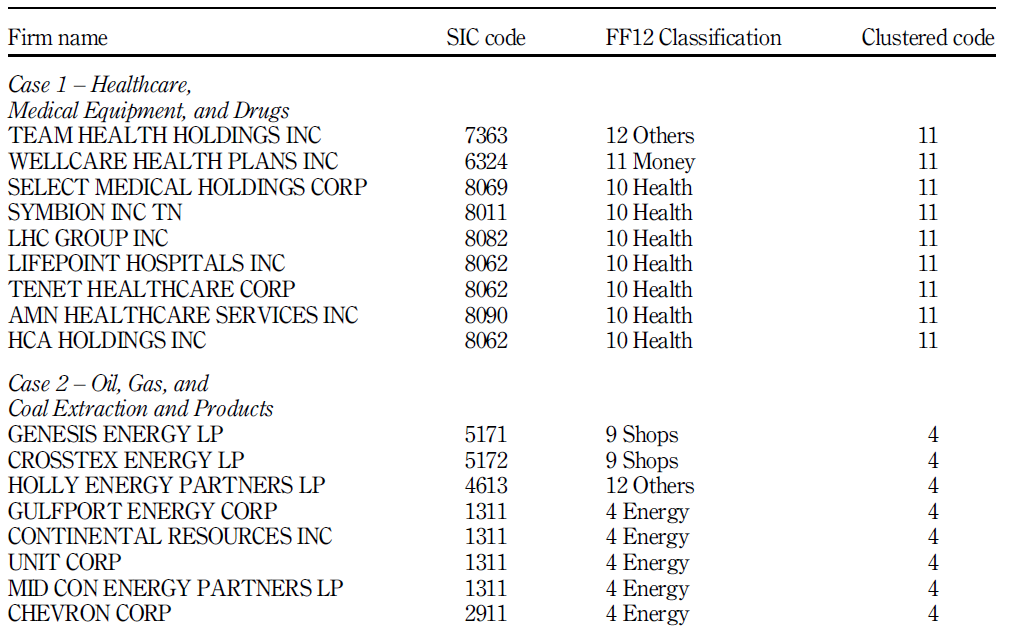
        </td>
        <td>
            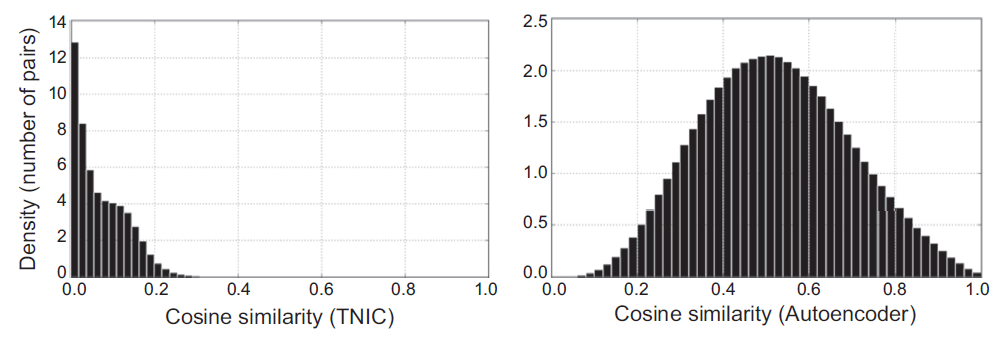
        </td>
    </tr>
</table>




<ol>
    위 그림과 같이 기존의 FF12 분류와, SIC 보다 더 정확하게 healthcare 관련된 회사들을 잘 분류했다는 것을 확인 할 수 있으며 <br>
    오른쪽 사진은 autoencoder 를 사용한 경우, 코사인 유사도의 분포가 더 symmetrically 하므로 더 정확한 분류가 가능함을 암시한다.<br>
    따라서 위 논문은, business descriptions 을 통하여 회사의 산업을 분류하는 것이 이전의 분류 방식보다 더 정확함을 밑의 사진을 통하여 암시하며, <br>
    autoencoder를 활용한 방식이 이전의 text-based classification을 더 향상시킬 수 있음을 암시한다.

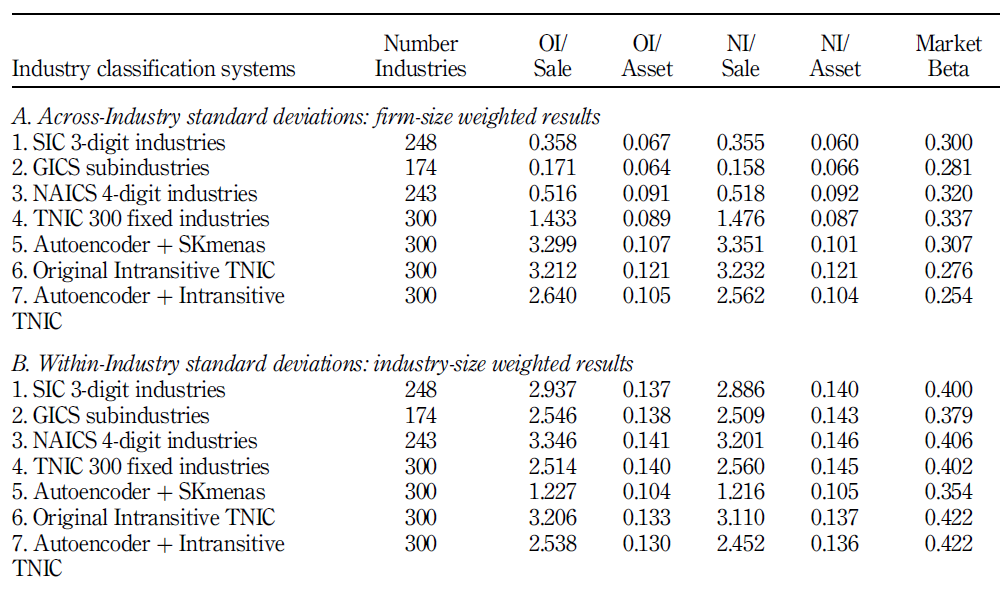

<ol>
    <b>2. Strategically Comparable Firm Finding Algorithm (CFFA): A Strategic Management Approach to Valuation (W.P, Kang 2021)</b> <br>
    기존의 Comparable Company Analysis (CA) 의 일반화된 방식으로 전략적 자원이 비슷한 기업들로 peer group을 형성하고 <br>
    회귀 분석을 기반으로 CCA와 같이 동료 회사의 평균을 넣는 것이 아닌, peer group의 기업 특성, 데이터 등을 전부 가중취 회귀하며 비선형 회귀, 재무 데이터의 곱 등을 전부 활용 가능하다. <br>
    뿐만 아니라, 회귀분석 기반인 이 알고리즘은 연구자의 선호, 방식에 따라 IV (도구변수 추정법), 머신 러닝 및 빅 데이터 분석을 통합 가능하다.
    아래의 보이는 표가 대표적인 CFFA의 방법으로 A,B가 peer group, C가 우리가 P/S ratio를 추정하고자 하는 target firm 일 때, <br>
    이미 알려진 A,B,C 의 growth, profitability 의 데이터를 기반으로, (growth : asset growth, sales growth, earnings growth 등) <br>
    (profitability : EV/EBITDA, return on asset (ROA), return on equity (ROE) 등) A,B와 C를 회귀하여, 가중치의 값이 1, 0.5 라는 것이 계산이 된다면, <br>
    P/S ratio는 2*1 + 6*0.5 = 5 라는 것이 계산이 되게 된다.


<table>
    <caption style='text-align:center;'> <b>[Wa, Wb] = [1, 0.5] </b></caption>
    <tr>
        <th> </th> <th>A</th> <th>B</th> <th>C (target)</th>
    </tr>
    <tr>
        <td>Growth  </td> <td>1%</td> <td>2%</td> <td>2%</td>
    </tr>
    <tr>
        <td>Profitability </td> <td>2%</td> <td>6%</td> <td>5%</td>
    </tr>
    <tr>
        <td>P/S ratio </td> <td>2%</td> <td>6%</td> <td>? -> 5%</td>
    </tr>
    
    
</table>

$$ \vec{y} = x\vec{\beta} + \vec{\epsilon}$$ <br>
$\vec{\beta}$ : (portfolio) weight to construct a synthetic comparable firm<br>
$x\vec{\beta}$ : constructed attributes of the synthetic firm<br>
$\vec{\epsilon}$ : errors between the attributes of the target and the synthetic firm<br>

### - Data, Method, Code, Results

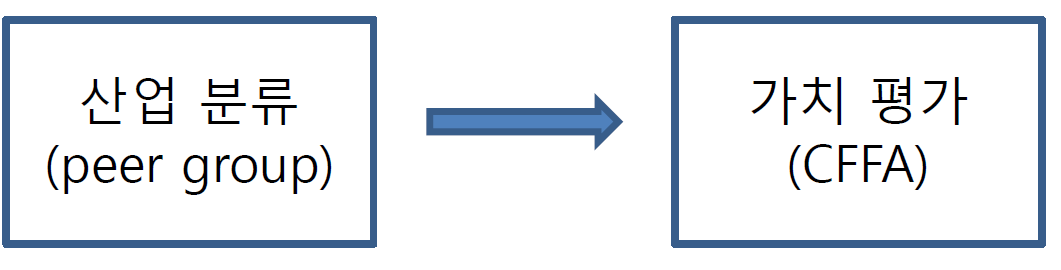

<ol>
    이전의 두 가지 대표 논문을 기반으로 Kim et al.(2022) 방법을 토대로 전략적 자원이 비슷한 기업(peer group)을 형성하였으며 <br>
    이 peer group 을 바탕으로 Kang(2021) 의 CFFA 알고리즈을 토대로 가치 평가를 진행하고자 한다. <br>
    허나, 선행 연구들과의 차별점을 위하여, 여러가지 방법을 시도하였으나, 결과가 좋지 못하였다. <br>
    - 뉴욕타임즈 api 와 SEC api 이용, 대중이 인식하는 산업과 사업보고서의 산업을 분류 시도하였다. 허나, 뉴욕타임즈 api의 호출 수가 적고, 확보한 SEC 10-K의 기업이 검색이 안되는 경우가 너무 많아서 <b>실패</b>하였다.
    - 텍스트 마이닝 후, 단순 단어의 빈도수 뿐만 아니라 구글 자연어 처리 Bert를 이용하여 중요도 순으로 추출 시도하였다.<br>
    허나, 15966개의 10-K 보고서에 대해 한 문서 추출도 bert 에서 오래 걸리며, common words가 bert 단어집 상 중요도가 가장 높게 책정되어 있어서 <b>실패</b>하였다.
    - 본 분석에서는 2013~2019까지의 15,932 보고서, 2,276개 기업을 사용하였는데 이는 시간, 성능 등의 한계로 어쩔 수 없었으며, <br>
    선행 연구 (Hogg : 1997~2008, 68,302, 5691 기업 사용 ,Kim : 2013~2016, 14,560, 3,640 기업 사용) 비해 <b>열악한</b> 퍼포먼스를 보인다. <br>
    - 기존 선행연구와 마찬가지로 SEC 10-K 바탕으로 business description에서 자연어 추출 후 binary vector 를 autoencoder 처리 한 후에 Spherical K-means clustering으로 분류하였으나, 차별점이 없다는 매우 큰 한계점을 지닌다.

<ol>
    <b>1. 10-K</b> <br>
    SEC-api 를 기반으로 전체 기업의 CIK(기업의 키)를 전부 내려받고, 각 CIK별로 필요한 연도의 10-K 보고서의 주소를 받았다.<br>
    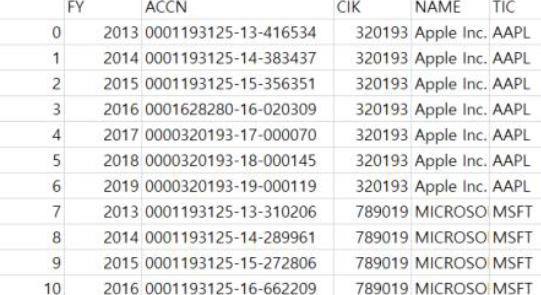 <br>
    위 사진에서 FY는 회계연도 ACCN은 10-K 보고서의 주소, CIK는 기업의 키 값, NAME은 회사이름, TIC는 기업의 티커를 의미한다.
    이후 10-K 보고서의 주소를 바탕으로 Web Crawling Scripts 를 이용하여, 단어를 추출하고자 하였으며, <br>
    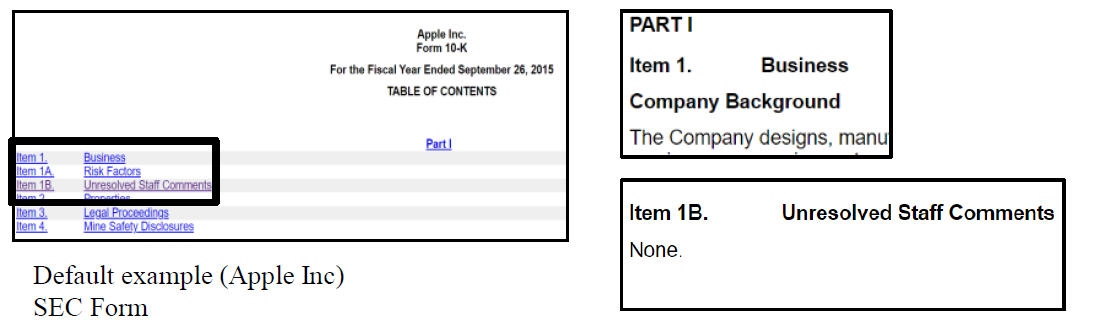 <br>
    위 사진과 같이, Business description은 Item 1, Item 1A 에 나타나게 된다. 그렇기에 Default 형태의 기업들은 Part 1, Item 1. Business 부터 Item 1B. Unresolved Staff Comments 직전 까지를 추출하면 된다.<br>
    하지만 Business의 복수 형 등의 변형은 or 문 등으로 찾기 편하지만, 기본 SEC Form 을 따르지 않고, 기업만의 방식을 따른 뒤 고지하는 경우가 존재한다... <br>
    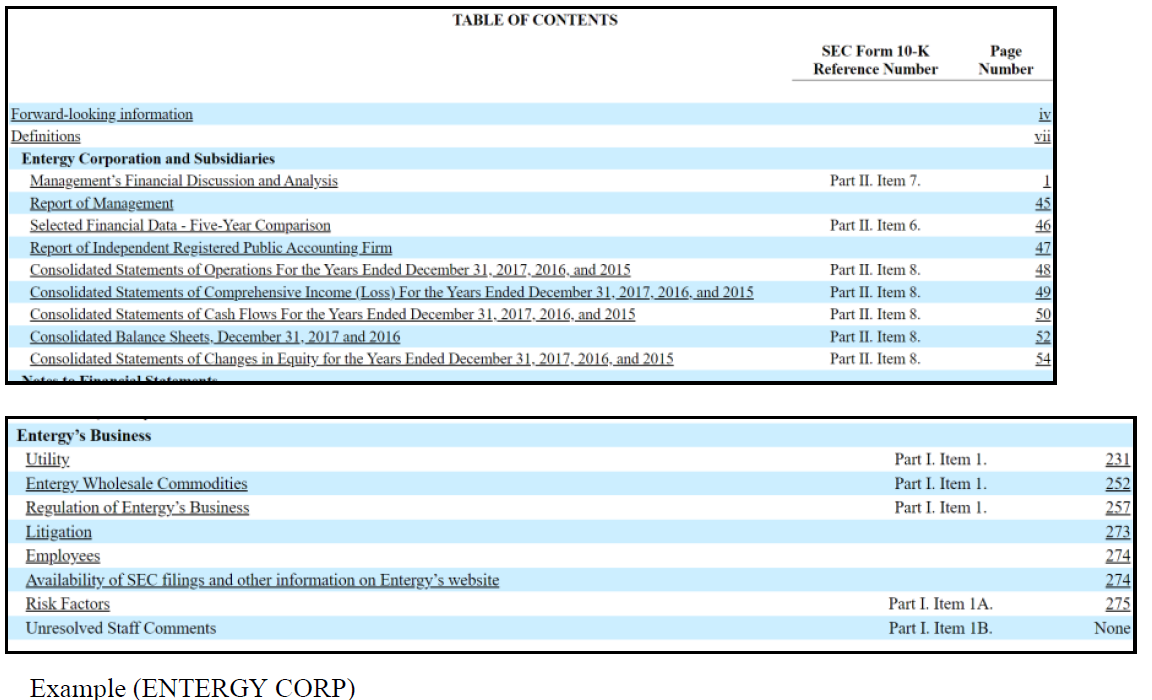 <br>
    이 경우는 어쩔 수 없이 직접 부문부문을 추정해야 하여 예외처리를 하게 된다. 그로 인하여 시간이 많이 소요되게 된다.

<ol>
    <b>2. nltk, collections 자연어 추출</b> <br>
    15,932 10-K 보고서를 멀티 프로세스를 이용하여 Web crawling 하여 text를 추출하였다.<br>
    그 중 기업의 전략적 자원을 식별하기 위하여 명사, 고유명사 등만 추출을 하였으며<br>
    각 보고서 장 마다 table of contents 가 계속 들어가고, company, companys 가 너무 많이 출현하기에, 배제하였다.<br>
    기존의 선행연구에서는 지리적 단어, 전체 빈도 20% 이상을 차지하는 단어는 제외하였으나, 이 분석에서는 지리적 단어는 많이 추출되지 않았고, <br>
    전체 빈도의 20% 이상을 차지하는 경우가 존재하지 않아 선행연구를 따르지 않았다. <br>
    선행 연구 에서는 빈도 수가 높은 2000개 단어를 추출하였으나, 본 분석에서는 1000개도 못 채우는 경우가 너무 많이 존재하여서, 1000개를 기준으로 잡았다. <br>
    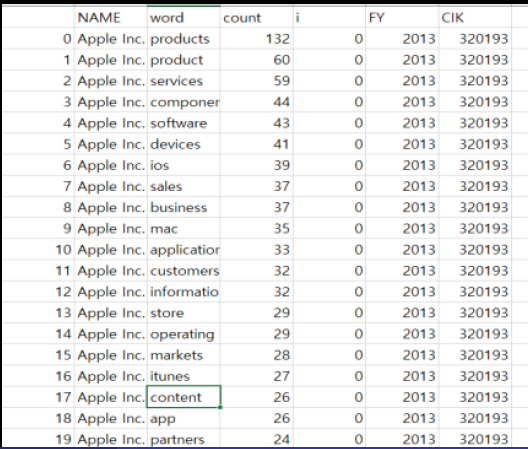 <br>
    위 사진은 CIK가 320193인 Apple 회사의 2013년 상위 단어 목록이며, software, application 등 전략적 자원을 잘 식별하는 것 으로 보인다. <br>
    아래의 코드는 1. ACCN과 CIK를 다운받는 코드와, 2. 확보한 ACCN 기반으로, 각 사업보고서의 Business description에서 상위 1000개 단어를 추출하는 코드이다. <br>

### 1. ACCN-CIK 다운로드

In [ ]:
# ACCN - CIK 결합
import requests
import pandas as pd
from bs4 import BeautifulSoup
import re
import nltk
from nltk import word_tokenize, pos_tag
from collections import Counter

url = 'https://www.sec.gov/files/company_tickers_exchange.json' #회사 티커 받는 SEC-api
headers = {'User-Agent': 'Mozilla'}
res = requests.get(url, headers=headers)
cik_list = res.json()
cik_df = pd.DataFrame(cik_list['data'], columns=cik_list['fields'])
cik_df['cik'] = cik_df['cik'].apply(lambda x: f'{x:010d}')

df = pd.DataFrame()

#10-K form 에서 CIK와 10-K form 주소 따오기
for i in range(0,len(cik_df) ): #len(cik_df) 예정
    cik = cik_df['cik'][i]
    name = cik_df['name'][i]
    ticker =  cik_df['ticker'][i]
    url = 'https://data.sec.gov/api/xbrl/companyfacts/CIK'+cik+'.json' #cik를 획득 하여 https://www.sec.gov/Archives/edgar/data/0000320193/0001193125-09-214859.txt 와 같이 cik-10k 형식 추출 예정
    headers = {'User-Agent': 'Mozilla'}
    res = requests.get(url, headers=headers)

    if res.status_code == 200:
        data = res.json()

        # facts 항목 가져오기
        facts = data.get('facts', {})
        if len(facts) >0:
            key1 = list(facts.keys())[0]
            key2 = list(facts[key1].keys())[0]
            key3 = list(facts[key1][key2]['units'].keys())[0]
            it =facts[key1][key2]['units'][key3]
            selected_items = []
            for item in it:
                if item.get('form') == '10-K':
                    fy = item.get('fy', '')
                    accn = item.get('accn', '')
                    selected_items.append({'FY': fy, 'ACCN': accn, 'CIK': cik, 'NAME': name, 'TIC' : ticker})

            df1 = pd.DataFrame(selected_items)
            df = pd.concat([df, df1], ignore_index=True)
    else:
        print('URL 찾지못함')
        print(cik, name)
    
#사용할 연도가 전부 존재하는 기업만 추출, 2013~2019의 보고서가 전부 존재해야됨
required_year = [2013,2014,2015, 2016, 2017, 2018, 2019]
df = df[df['FY'].isin(required_year)].groupby('CIK').filter(lambda x: x['FY'].nunique() == len(required_year)) #required_year 값이 존재하는 것만 추출 후, 전부 존재하는것만 len로 추출함
df.reset_index(inplace=True, drop=True)
df.to_csv('ALL_df.csv')

In [2]:
'''
import torch
from transformers import BertTokenizer, BertModel
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import pandas as pd

def Bert(words):
    # BERT 임베딩 생성
    inputs = tokenizer(words, return_tensors="pt", padding=True, truncation=True, max_length=512)
    outputs = model(**inputs)
    word_embeddings = outputs.last_hidden_state.mean(1)

    # TF-IDF 계산
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(words)
    tfidf_scores = np.array(tfidf_matrix.sum(axis=0)).flatten()

    # 각 단어의 중요도 평가
    word_importance = []
    for i, word in enumerate(words):
        try:
            importance = tfidf_scores[vectorizer.vocabulary_[word]] * torch.norm(word_embeddings[i])
            word_importance.append((word, importance))
        except KeyError:
            # 어휘 사전에 없는 단어는 무시
            pass

    from collections import defaultdict

    # 단어별로 중요도 합산
    word_importance_sum = defaultdict(float)
    for word, importance in word_importance:
        word_importance_sum[word] += importance.item() # torch.Tensor를 float로 변환

    # 중요도에 따라 정렬
    sorted_importance = sorted(word_importance_sum.items(), key=lambda x: x[1], reverse=True)

    import nltk
    from nltk.corpus import stopwords

    words, _ = zip(*sorted_importance)

    # 품사 태깅
    tagged_words = nltk.pos_tag(words)

    # 명사와 자연어
    filtered_words = [word for word, tag in tagged_words if tag in ('NN', 'NNP')]
    filtered_words1 = [word for word in filtered_words if word not in ['table', 'contents', 'company', 'companys']]
    top_1000_natural_words = filtered_words1[:1000]
    ddf = pd.DataFrame(top_1000_natural_words, columns=['Bert'])
    return ddf
'''

C:\Users\이세준\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### 2. 사업보고서의 Business description에서 상위 1000개 단어를 추출

In [3]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import re
import nltk
from nltk import word_tokenize, pos_tag
from collections import Counter
import logging
import sys, traceback

logging.basicConfig(level=logging.ERROR)

def textmaking(start_num, end_num): #Business description 부분에서 단어 추출하기 위한 함수
    try:
        df = pd.read_csv('ALL_df.csv', index_col=0)
        print(start_num, '~', end_num) #멀티프로세스가 잘 되고 있는지 확인하기 위한 용도

        #한번만 설치
        #nltk.download('punkt')
        #nltk.download('averaged_perceptron_tagger')

        #word_df = pd.DataFrame()
        word_df = pd.DataFrame(columns=['FY', 'CIK', 'NAME', 'word', 'count'])
        #ii=0
        #if len(word_df) != 0:
        #    ii=word_df.loc[len(word_df)-1, 'i']+1

        for i in range(start_num, end_num):#15966, len(df)):
            intel = 0
            morgan = 0
            key = 0
            ge=0
            gen=0
            att=0
            city=0
            edison = 0
            cardinal=0
            entergy=0
            forrester =0
            wy=0
            MRTX = 0
            clean = 0
            freddie = 0
            fy = df['FY'][i]
            cik= df['CIK'][i]
            name= df['NAME'][i].replace('/', '-')
            name= name.replace('\\', '-')
            ACCN = df['ACCN'][i]
            ACCN1 = df['ACCN'][i].replace('-', '')
            url = 'https://www.sec.gov/Archives/edgar/data/'+str(cik)+'/'+str(ACCN1)+'/'+str(ACCN)+'.txt'

            headers = {'User-Agent': 'Mozilla'}
            res = requests.get(url, headers=headers)
            text=[]
            if res.status_code == 200:
                # BeautifulSoup을 사용하여 HTML 파싱
                if i>=256 and i<= 258:
                    soup = BeautifulSoup(res.text, 'html.parser')
                    intel = 1
                elif (i>=319 and i<=321) or (i>=2010 and i<=2016): #overview 이후 financial 까지 해야되는 경우
                    soup = BeautifulSoup(res.text, 'lxml')
                    morgan = 1
                elif (i>=344 and i<=349) or (i>=1922 and i<=1925): #about 뭐시기로 끊고 바로 legal 까지 대문자 형태로 구분이 되는 경우
                    if i<349:
                        first = res.text.find("ABOUT GENERAL ELECTRIC")
                    elif i<1925:
                        first = res.text.find("ABOUT MOLINA HEALTHCARE")
                    end = res.text.find("LEGAL PROCEEDINGS")
                    tt = res.text[first:end]
                    soup = BeautifulSoup(tt, 'lxml')
                    ge=1
                elif (i>=595 and i<= 601):
                    soup = BeautifulSoup(res.text, 'lxml')
                    city = 1
                    if i == 595:
                        city = 2
                elif (i>=1710 and i<=1715): #EDISON 형식, CORPORATE STRUCTURE, INDUSTRY AND OTHER INFORMATION 부터 staff 까지
                    soup = BeautifulSoup(res.text, 'lxml')
                    edison = 1
                elif (i>=1753 and i<=1757) or (i>=2031 and i<=2033):#business general 꼴
                    soup = BeautifulSoup(res.text, 'lxml')
                    cardinal=1
                elif (i>=1877 and i<=1883): #OUrbusiness 형식으로 되어있어서 구분이 힘든 애들
                    soup = BeautifulSoup(res.text, 'lxml')
                    wy = 1
                elif (i>=2003 and i<=2009): #entergy 형식들, 아예 형식이 너무 다름
                    try: #lxml이 안먹는 애들
                        soup = BeautifulSoup(res.text, 'html.parser')
                    except:
                        soup = BeautifulSoup(res.text, 'lxml')

                    entergy = 1
                elif (i>=5214 and i<=5220):
                    try: #lxml이 안먹는 애들
                        soup = BeautifulSoup(res.text, 'html.parser')
                    except:
                        soup = BeautifulSoup(res.text, 'lxml')
                    MRTX = 1
                elif i == 181:
                    first = res.text.find("BUSINESS SUMMARY")
                    end = res.text.find("LEGAL PROCEEDINGS")
                    tt = res.text[first:end]
                    soup = BeautifulSoup(tt, 'lxml')
                    ge=1
                elif i== 7309:
                    first = res.text.find("THE COMPANY")
                    end = res.text.find("LEGAL PROCEEDINGS")
                    tt = res.text[first:end]
                    soup = BeautifulSoup(tt, 'lxml')
                    ge=1
                elif (i>=9933 and i<= 9937): #part i general 로 시작하는 형태
                    soup = BeautifulSoup(res.text, 'lxml')
                    forrester = 1
                elif (i>=10600 and i <= 10604):
                    soup = BeautifulSoup(res.text, 'html.parser')
                    freddie = 1
                elif (i>=14100 and i<=14101):
                    soup = BeautifulSoup(res.text, 'html.parser')
                    clean = 1
                elif (i>=14450 and i<=14451):
                    soup = BeautifulSoup(res.text, 'html.parser')
                    gen = 1
                else:
                    try: #lxml이 안먹는 애들
                        soup = BeautifulSoup(res.text, 'html.parser')
                    except:
                        soup = BeautifulSoup(res.text, 'lxml')

                # 모든 스크립트와 스타일 태그 제거
                for script in soup(["script", "style"]):
                    script.extract()

                # 텍스트 추출
                text = soup.get_text().strip()
                # 텍스트에서 구두점 및 공백 제거 
                text = re.sub(r'[^\w\s]','', text)
                text = re.sub(r'\xa0', ' ', text)    
                text = re.sub(r'\n', ' ', text)
                text = re.sub(r'\s+', ' ', text)
                text = text.lower()

                if intel == 1:
                    start_index = text.find("introduction to our business")
                    first_met = text.find("availability of company information") #처음으로 만나는 끝 직전
                    if ((start_index - first_met) < 0) and ((start_index - first_met) > -1000): #목차에서 서로 나타난다는 뜻임 unresolved 항목은 어떻게든 반드시 목차에선 저 문구대로 나올 예정
                        #슬라이스 후 item1 business 찾고 unresovlved 그 이후 찾기
                        text = text[start_index+len('item'):]
                        start_index = text.find("introduction to our business")
                        text = text[start_index+len('item'):]
                        end_index = text.find("availability of company information") #처음으로 만나는 끝 직전
                        text=text[:end_index]
                       # print('완료 : ', url, len(text))
                        key = 1
                    elif ((start_index - first_met) > 0) or ((start_index - first_met) < -1000): #목차에서 item1 business 형태가 아니라는 뜻임 아마 바로 항목으로 갈꺼임 / -1000은 목차가 없는 경우 방지 위해서 즉 바로 item1 나오는거
                        #슬라이스 후 바로 unresolved 찾기
                        text = text[start_index+len('item'):]
                        start_index = text.find("introduction to our business")
                        text = text[start_index+len('item'):]
                        end_index = text.find("availability of company information") #처음으로 만나는 끝 직전
                        text=text[:end_index]
                        #print('완료 : ', url, len(text))
                        key = 1
                elif i == 2023:
                    start_index = text.find("business overview")
                    first_met = text.find("selected financial data") #처음으로 만나는 끝 직전
                    if ((start_index - first_met) < 0) and ((start_index - first_met) > -1000): #목차에서 서로 나타난다는 뜻임 unresolved 항목은 어떻게든 반드시 목차에선 저 문구대로 나올 예정
                        #슬라이스 후 item1 business 찾고 unresovlved 그 이후 찾기
                        text = text[start_index+len('item'):]
                        start_index = text.find("business overview")
                        text = text[start_index+len('item'):]
                        end_index = text.find("selected financial data") #처음으로 만나는 끝 직전
                        text=text[:end_index]
                        #print('완료 : ', url, len(text))
                        key = 1
                    elif ((start_index - first_met) > 0) or ((start_index - first_met) < -1000): #목차에서 item1 business 형태가 아니라는 뜻임 아마 바로 항목으로 갈꺼임 / -1000은 목차가 없는 경우 방지 위해서 즉 바로 item1 나오는거
                        #슬라이스 후 바로 unresolved 찾기
                        text = text[start_index+len('item'):]
                        start_index = text.find("overview")
                        text = text[start_index+len('item'):]
                        end_index = text.find("selected financial datas") #처음으로 만나는 끝 직전
                        text=text[:end_index]
                        #print('완료 : ', url, len(text))
                        key = 1
                elif (i >= 15680 and i<= 15685): #갑자기 얘 혼자만 overview 부터 시작함
                    start_index = text.find("overview")
                    text = text[start_index+len('item'):]
                    end_index = text.find("unresolved staff comments")
                    text=text[:end_index]
                    #print('완료 : ', url, len(text))
                    key = 1
                elif gen == 1:
                    start_index = text.find('company background')
                    text = text[start_index:]
                    end_index = text.find('unresolved staff comments')
                    text = text[:end_index]
                    key = 1
                elif morgan == 1:
                    start_index = text.find("overview")
                    first_met = text.find("selected financial data") #처음으로 만나는 끝 직전
                    if ((start_index - first_met) < 0) and ((start_index - first_met) > -1000): #목차에서 서로 나타난다는 뜻임 unresolved 항목은 어떻게든 반드시 목차에선 저 문구대로 나올 예정
                        #슬라이스 후 item1 business 찾고 unresovlved 그 이후 찾기
                        text = text[start_index+len('item'):]
                        start_index = text.find("overview")
                        text = text[start_index+len('item'):]
                        end_index = text.find("selected financial data") #처음으로 만나는 끝 직전
                        text=text[:end_index]
                        #print('완료 : ', url, len(text))
                        key = 1
                    elif ((start_index - first_met) > 0) or ((start_index - first_met) < -1000): #목차에서 item1 business 형태가 아니라는 뜻임 아마 바로 항목으로 갈꺼임 / -1000은 목차가 없는 경우 방지 위해서 즉 바로 item1 나오는거
                        #슬라이스 후 바로 unresolved 찾기
                        text = text[start_index+len('item'):]
                        start_index = text.find("overview")
                        text = text[start_index+len('item'):]
                        end_index = text.find("selected financial datas") #처음으로 만나는 끝 직전
                        text=text[:end_index]
                        #print('완료 : ', url, len(text))
                        key = 1
                elif MRTX == 1:
                    pattern = r"business\s?overview"
                    match = re.search(pattern, text)
                    if match:
                        start_index=match.end()
                        end_index = text[30000:].find("unresolved staff comments") #처음으로 만나는 끝 직전
                        if end_index == -1:
                            end_index = text[30000:].find("unresolved sec staff comments")
                            if end_index== -1:
                                end_index = text[30000:].find("legal proceedings") 
                        text=text[:end_index+30000]
                        #print('완료 : ', url, len(text))
                        key = 1
                elif edison == 1:
                    start_index = text.find('corporate structure')
                    text=text[start_index:]
                    end_index = text[30000:].find("unresolved staff comments") #처음으로 만나는 끝 직전
                    if end_index == -1:
                        end_index = text[30000:].find("unresolved sec staff comments")
                        if end_index== -1:
                            end_index = text[30000:].find("legal proceedings") 
                    text=text[:end_index+30000]
                    #print('완료 : ', url, len(text))
                    key = 1
                elif cardinal == 1:
                    pattern = r"business\s?general"
                    match = re.search(pattern, text)
                    if match:
                        start_index = match.end()
                        first_met = text.find("legal proceedings") #처음으로 만나는 끝 직전
                        if first_met == -1:
                            first_met = text.find("legal proceedings")
                        if ((start_index - first_met) < 0) and ((start_index - first_met) > -1000): #목차에서 서로 나타난다는 뜻임 unresolved 항목은 어떻게든 반드시 목차에선 저 문구대로 나올 예정
                            #슬라이스 후 item1 business 찾고 unresovlved 그 이후 찾기
                            text = text[start_index+len('item'):]
                            match = re.search(pattern, text)
                            if match:
                                start_index = match.end()
                                text = text[start_index+len('item'):]
                                end_index = text[30000:].find("legal proceedings") #처음으로 만나는 끝 직전
                                text=text[:end_index+30000]
                                #print('완료 : ', url, len(text))
                                key = 1
                        elif ((start_index - first_met) > 0) or ((start_index - first_met) < -1000): #목차에서 item1 business 형태가 아니라는 뜻임 아마 바로 항목으로 갈꺼임 / -1000은 목차가 없는 경우 방지 위해서 즉 바로 item1 나오는거
                            #슬라이스 후 바로 unresolved 찾기
                            text = text[start_index+len('item'):]
                            end_index = text[30000:].find("legal proceedings") #처음으로 만나는 끝 직전
                            text=text[:end_index+30000]
                            #print('완료 : ', url, len(text))
                            key = 1
                elif ge == 1:
                    key = 1
                    #print('완료 : ', url, len(text))
                elif forrester == 1:
                    pattern = r"part\s?i\s?general"
                    match = re.search(pattern, text)
                    if match:
                        start_index=match.end()
                        text = text[start_index+len('item'):]
                        end_index = text[30000:].find("unresolved staff comments") #처음으로 만나는 끝 직전
                        if end_index == -1:
                            end_index = text[30000:].find("unresolved sec staff comments")
                            if end_index== -1:
                                end_index = text[30000:].find("legal proceedings") 
                        text=text[:end_index+30000]
                        #print('완료 : ', url, len(text))
                        key = 1
                elif wy == 1:
                    start_index = text.find('our businesswe are')
                    text=text[start_index:]
                    end_index = text[30000:].find("unresolved staff comments") #처음으로 만나는 끝 직전
                    if end_index == -1:
                        end_index = text[30000:].find("unresolved sec staff comments")
                        if end_index== -1:
                            end_index = text[30000:].find("legal proceedings") 
                    text=text[:end_index+30000]
                    #print('완료 : ', url, len(text))
                    key = 1
                elif city > 0:
                    start_index = text.find('citigroups history')
                    text=text[start_index:]
                    if city == 2:
                        end_index = text.find('risk managementoverview')
                    elif city == 1:
                        end_index = text.find('managing global risk table of contents')
                    text=text[:end_index]
                    key = 1
                    #print('완료 : ', url, len(text)) 
                elif freddie == 1:
                    start_index = text.find('freddie mac is a gse')
                    text=text[start_index:]
                    end_index = text.find('we are involved as a party')
                    text=text[:end_index]
                    key = 1
                    #print('완료 : ', url, len(text)) 
                elif entergy == 1:
                    text = re.sub(r'font|style', ' ', text)
                    start_index = text.find('entergy is an integrated energy company')
                    text = text[start_index:]
                    end_index = text.find('entergy arkansas inc and subsidiaries')
                    text = text[:end_index]
                    #print('완료 : ', url, len(text))
                    key = 1
                elif clean == 1:
                    start_index = text.find('general business overview')
                    text = text[start_index:]
                    end_index = text.find('unresolved staff comments')
                    text = text[:end_index]
                    #print('완료 : ', url, len(text))
                    key = 1
                else:
                    pattern = r".*?i{0,2}tems?\s?(1|i|(1 i))\s?(1a\s)?(2|1a|and\s2\s?)?(discussion of|description of|our)?\s?(the\s?)?busines"
                    match = re.search(pattern, text)
                    if match:
                        start_index = match.end()
                        first_met = text.find("unresolved staff comments") #처음으로 만나는 끝 직전
                        if first_met == -1:
                            first_met = text.find("unresolved sec staff comments")
                            if first_met== -1:
                                first_met = text.find("item 2 properties") 
                                if first_met == -1:
                                    first_met = text.find("legal proceedings") 
                        if ((start_index - first_met) < 0) and ((start_index - first_met) > -1000): #목차에서 서로 나타난다는 뜻임 unresolved 항목은 어떻게든 반드시 목차에선 저 문구대로 나올 예정
                            #슬라이스 후 item1 business 찾고 unresovlved 그 이후 찾기
                            text = text[start_index+len('item'):]
                            match = re.search(pattern, text)
                            if match:
                                start_index = match.end()
                                text = text[start_index+len('item'):]
                                end_index = text[10000:].find("unresolved staff comments") #처음으로 만나는 끝 직전
                                if end_index == -1:
                                    end_index = text[10000:].find("unresolved sec staff comments")
                                    if end_index== -1:
                                        end_index = text[10000:].find("item 2 properties") 
                                        if end_index == -1:
                                            end_index = text[10000:].find("legal proceedings") 
                                text=text[:end_index+10000]
                                #print('완료 : ', url, len(text))
                                key = 1
                        elif ((start_index - first_met) > 0) or ((start_index - first_met) < -1000): #목차에서 item1 business 형태가 아니라는 뜻임 아마 바로 항목으로 갈꺼임 / -1000은 목차가 없는 경우 방지 위해서 즉 바로 item1 나오는거
                            #슬라이스 후 바로 unresolved 찾기
                            text = text[start_index+len('item'):]
                            end_index = text[10000:].find("unresolved staff comments") #처음으로 만나는 끝 직전
                            if end_index == -1:
                                end_index = text[10000:].find("unresolved sec staff comments")
                                if end_index== -1:
                                    end_index = text[10000:].find("item 2 properties") 
                                    if end_index == -1:
                                        end_index = text[10000:].find("legal proceedings") 
                            text=text[:end_index+10000]
                            #print('완료 : ', url, len(text))
                            key = 1
                    else:
                        print('error2 : ', url)

                #설치는 이미 했으면 필요는 없음
                #nltk.download('punkt')
                #nltk.download('averaged_perceptron_tagger')


                if(key == 1):
                    # 텍스트에서 구두점 및 공백 제거 (이미 수행한 부분)
                    text = re.sub(r'[^\w\s]', '', text)

                    # 단어를 소문자로 변환하고 공백을 기준으로 분할 (이미 수행한 부분)
                    words = text.lower().split()
                    
                    #혹시 모르니 정제한 txt 파일을 저장을 해 놓자
                    text_str = ''.join(text)
                    file = open("C:/Users/이세준/자산평가/text/"+str(name)+"-"+str(fy)+".txt", "w", encoding="utf-8")
                    file.write(text_str)
                    file.close()
                    
                    #ddf = Bert(words)
                    
                    #배제하는방법 ex table, contents 등
                    words = [word for word in words if word not in ['table', 'contents', 'company', 'companys']]

                    # 토큰화된 단어에 품사 태깅 수행
                    tagged_words = pos_tag(words)

                    # 명사 및 고유 명사 추출
                    nouns = [word for word, pos in tagged_words if pos in ['NN', 'NNS', 'NNP', 'NNPS']]

                    word_counts = Counter(nouns)

                    # 가장 빈도가 높은 상위 20개 단어 추출
                    top_20_words = word_counts.most_common(1000)      #논문 따라 2000으로 증량 필요할것, 또한 한다면 risk factors 까지가 아닌, item 2까지일수도
                    selected_items = []
                    for word, count in top_20_words:
                        selected_items.append({'FY': fy, 'CIK': cik, 'NAME': name, 'word' : word, 'count' : count, 'i' : i})

                    df2 = pd.DataFrame(selected_items)
                    word_df = pd.concat([word_df, df2], ignore_index=True)
                    word_df = pd.concat([word_df, ddf], ignore_index=True)
                    word_df.to_csv('word_df-'+str(start_num)+'.csv')
                else:
                    print('error3', url)

            else: 
                print('통신에러')
        word_df.to_csv('word_df-'+str(start_num)+'.csv')
        return(word_df)
    except:
        logging.error(traceback.format_exc())
        

In [ ]:
import os
import multiprocessing
from concurrent.futures import ThreadPoolExecutor, ProcessPoolExecutor, TimeoutError
import pandas as pd



#ranges = [(5441, 6000), (8741, 9000), (9577, 10000), (10621, 11000), (12531, 13000), (13132, 14000), (15001, 15965)]
ranges = [(i, i + 1000) for i in range(0, 15000, 1000)] + [(15000, 15966)]

result_data = pd.DataFrame()

#tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
#model = BertModel.from_pretrained('bert-base-uncased')

with ThreadPoolExecutor(max_workers=5) as executor:
    executor.map(lambda x: textmaking(*x), ranges)
    #results = executor.map(lambda x: textmaking(*x), ranges)
    #for group_data_s in results:
        #result_data = pd.concat([result_data, group_data_s])
        
#result_data.to_csv('resutl.csv')

Using threads: 6
4000 ~ 5000
0 ~ 1000
2000 ~ 3000
1000 ~ 2000
3000 ~ 4000


In [ ]:
#혹시 멀티프로세스 오류 등으로 따로 저장되어서 병합이 필요한 경우

import os
import pandas as pd
import re

def loadmerge_csv(path):
    files = os.listdir(path)

    file_data = []
    for file in files:
        match = re.search(r'-(\d+)\.csv$', file)
        if match:
            number = int(match.group(1))
            file_data.append((number, file))

    #정렬
    file_data.sort()

    # 병합
    merged_df = pd.DataFrame()
    for _, file in file_data:
        df = pd.read_csv(os.path.join(path, file))
        merged_df = pd.concat([merged_df, df], ignore_index=True)

    return merged_df


path = os.path.dirname(os.path.realpath(__file__))
merged_df = loadmerge_csv(path)
merged_df = merged_df.drop(merged_df.columns[0], axis=1)
merged_df.to_csv('word_df.csv')

<ol>
    <b>3. Firm_word_vector & All_word_vector </b> <br>
    각 기업별로 Business description의 총 길이가 다르기도 하고, 같은 기업 내에서도 연도별로 형식 길이 등이 다르다. <br>
    그렇기에 단순 빈도수로 count를 하는 것이 아니라, 각 상위 단어에 대해서 가중치를 부여하는 Rank 방식이나 <br>
    혹은 전체 길이에서 어느정도 빈도로 나타나는지 Ratio 등도 고려 할 만 하다. <br>
    각 기업의 연도별 1000개 단어에 대해서 상위 출현 단어부터 가중치를 주어 모든 연도를 합친 1000개의 단어를 Firm_word_vector <b>(V)</b> 라 하고, <br>
    전체 기업의 각 연도별 1000개 단어에 대해서 상위 출현 단어부터 가중치를 주어 모든 연도를 합친 1000개의 단어를 All_word_vector <b>(W)</b> 라 한다. <br>
    이후 각 기업별로 W 벡터에 들어있는 단어가 존재하는 경우 1로 매칭을 해 준다.
    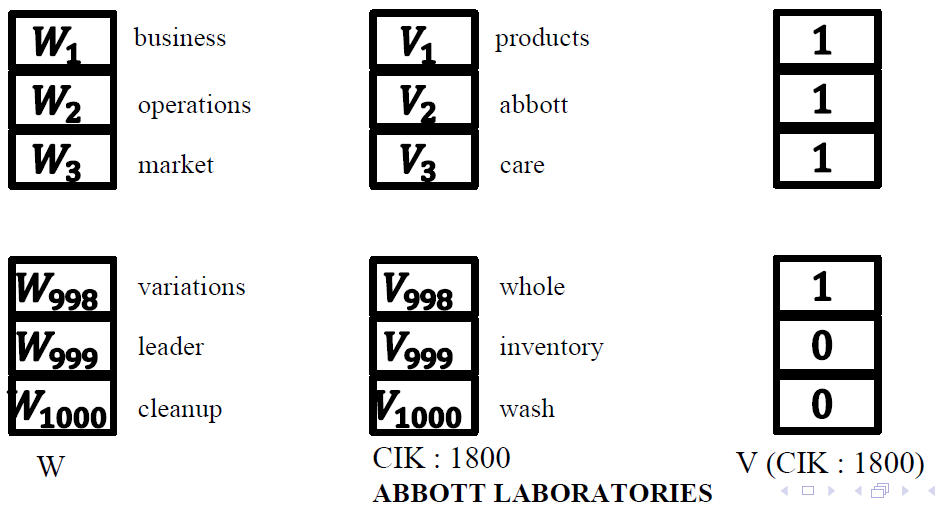 <br>
    위의 사진은 ABBOTT LABORAATORIES 의 예시이다. 만일 W vector의 첫 번째 단어인 business가 Firm_word_vector 안에 존재하는 경우 1과 0으로 임베딩 되는 V vector의 첫 번째 값은 1로 <br>
    이를 W vector의 단어 전체에 동일하게 적용하여 binary vector V 를 획득 가능하다. <br>
    아래의 코드는 구성한 전체 회사의 연도별 단어 집 word_df.csv를 기반으로 weight에 rank값을 준 후, 이를 기반으로 전체 단어집인 W와 word_counts 라는 각 기업별 단어집을 통해서 <br>
    Binary vector V 를 형성하는 과정이다. <br>

In [35]:
import pandas as pd
#20-length word vector 생성 W vector
word_df = pd.read_csv('word_df.csv',index_col=0,low_memory=False)
word_df['weight'] = word_df.groupby(['NAME', 'FY'])['count'].rank(ascending=True)
wword_counts = word_df.groupby('word')['weight'].sum()
top_20_wwords = wword_counts.sort_values(ascending=False).head(1000) #2000으로 바뀔 예정, 전체집단에 대해서 순위권 높은거 많이 든 애들임
W = pd.DataFrame({'word' : top_20_wwords.index})

W.to_csv('W.csv', index=True)

#각 cik별 firm vetor 생성 
word_counts = word_df.groupby(['CIK', 'word'])['weight'].sum().reset_index()

# 각 'CIK' 별로 상위 20개 단어 선택
top_words = word_counts.groupby('CIK').apply(lambda x: x.nlargest(1000, 'weight'))
result_df = top_words.reset_index(drop=True)
#result_df가 회사들 전부 해서 포함되어 있음

firms = result_df['CIK'].unique() 
#result_df[result_df['CIK'] == firms[0]] 방식으로 특정 회사 firm vector 추출 가능

V = pd.DataFrame()
for i in range(0, len(firms)):
    firm_vec = result_df[result_df['CIK'] == firms[i]]
    W1 = W.copy()
    W1['CIK'] = firms[i]
    for j in range(0, len(W)):
        if W['word'][j] in firm_vec['word'].values:
            W1.loc[j,'vec']= 1
        else:
            W1.loc[j,'vec']= 0
    V = pd.concat([V, W1], ignore_index=True)

<ol>
    <b>4. Autoencoder </b> <br>
    - Radovanovic et al.(2010) 이 지적하였듯, Cosine similarity 를 측정 시, 고차원 벡터는 쌍 별 Cosine similarity 값이 일정하고, 분산이 0 으로 수렴 가능하다. <br>
    - 따라서, Autoencoder 로 dimensionality reduction 사용하여 high dimension 문제를 해결하고자 한다. <br>
    - Autoencoder 는 입력 데이터를 압축 (encoding) 후 다시 복원 (decoding) 하는 비지도 학습으로 데이터의 특징을 학습하고 , 차원을 축소하며 노이즈 제거등에 사용하는 신경망 구조 이다. <br>
    - 학습을 시킨 후, 전체 데이터에 대해서 적용을 해야 되기에, 전체 CIK(기업들) 에 대해서 0.4의 비율로 split을 한 다음 test set에서 50%는 값 검정에 사용하였다. (train : 0.4, validation : 0.3, test : 0.3) <br>
    - 이 때, 전체 데이터에 적용을 해야 하는데, 정확도를 위하여, 여러번 학습을 하여 가장 좋은 train set 의 학습 결과로 적용을 시키고자 한다.
    - 20 번의 random_state 바탕으로 , Test loss 가 가장 적은 state 의 train 값으로 전체 데이터를 autoencoding 해 주었다. <br>
<table>
    <tr>
        <td>
            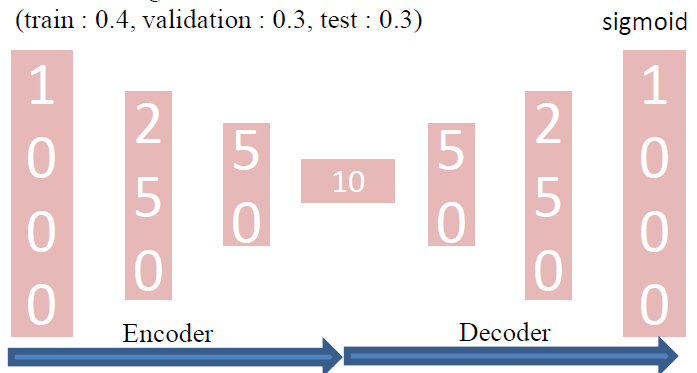
        </td>
        <td>
            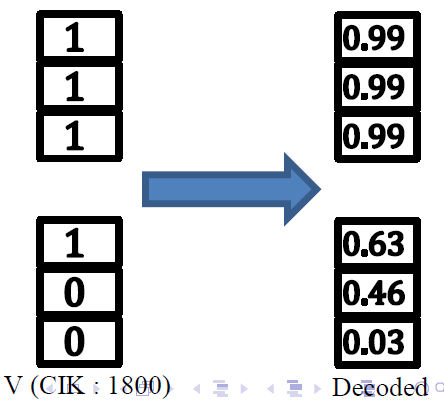
        </td>
    </tr>
</table>


### Autoencoder 정의

In [8]:
#autoencoder compile

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras import layers, losses

latent_dim = 1000


class Autoencoder(Model):
  def __init__(self, latent_dim):
    super(Autoencoder, self).__init__()
    self.encoder = tf.keras.Sequential([
            layers.Flatten(),
            layers.Dense(250, activation='relu'),
            layers.Dense(50, activation='relu'),
            layers.Dense(10, activation='relu')
        ])
    # 디코더 부분: 10 -> 50 -> 250 -> 1000
    self.decoder = tf.keras.Sequential([
        layers.Dense(50, activation='relu'),
        layers.Dense(250, activation='relu'),
        layers.Dense(1000, activation='sigmoid')
    ])
  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = Autoencoder(latent_dim)

autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

### V vector 에 대하여, train을 진행한 후, 최적의 모델로 autoencoding된 V 산출

In [13]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

V = pd.read_csv('V.csv', index_col=0)

def prepare_data(ciks):
    data = []
    for cik in ciks:
        t = V[V['CIK'] == cik]['vec'].tolist()
        data.append(t)
    return np.array(data)

# 여러 random_state 값으로 데이터 분할 및 평가
best_test_loss = float('inf')
best_random_state = -1

for random_state in range(20):
    # 데이터 분할
    unique_ciks = V['CIK'].unique()
    train_ciks, test_ciks = train_test_split(unique_ciks, test_size=0.4, random_state=random_state)
    test_ciks, val_ciks = train_test_split(test_ciks, test_size=0.5, random_state=random_state)

    # 데이터 준비
    train_data = prepare_data(train_ciks)
    val_data = prepare_data(val_ciks)
    test_data = prepare_data(test_ciks)

    # 모델 학습
    autoencoder.fit(train_data, train_data,
                    epochs=50,
                    batch_size=256,
                    validation_data=(val_data, val_data), verbose=0)

    # 모델 평가
    test_loss = autoencoder.evaluate(test_data, test_data)
    print(f"Test loss with random state {random_state}: {test_loss}")

    # 최적의 모델 선택
    if test_loss < best_test_loss:
        best_test_loss = test_loss
        best_random_state = random_state

# 최적의 random_state를 사용하여 전체 데이터셋에 대한 'decode' 값 산출
train_ciks, _ = train_test_split(unique_ciks, test_size=0.4, random_state=best_random_state)
train_data = prepare_data(train_ciks)
autoencoder.fit(train_data, train_data, epochs=50, batch_size=256, verbose=0)

all_data = prepare_data(unique_ciks)
decoded_data = autoencoder.predict(all_data)

# 결과 저장
decode1 = [item for sublist in decoded_data for item in sublist]
V['decode'] = pd.DataFrame(decode1)
V.to_csv('V_best.csv', index=True)


15/15 [==============================] - 0s 1ms/step - loss: 0.1422
Test loss with random state 0: 0.14220520853996277
15/15 [==============================] - 0s 1ms/step - loss: 0.1424
Test loss with random state 1: 0.14243869483470917
15/15 [==============================] - 0s 929us/step - loss: 0.1423
Test loss with random state 2: 0.1423157900571823
15/15 [==============================] - 0s 929us/step - loss: 0.1430
Test loss with random state 3: 0.14304107427597046
15/15 [==============================] - 0s 1ms/step - loss: 0.1426
Test loss with random state 4: 0.14255671203136444
15/15 [==============================] - 0s 1ms/step - loss: 0.1425
Test loss with random state 5: 0.14250662922859192
15/15 [==============================] - 0s 929us/step - loss: 0.1436
Test loss with random state 6: 0.14355026185512543
15/15 [==============================] - 0s 929us/step - loss: 0.1419
Test loss with random state 7: 0.1418546587228775
15/15 [==============================] - 0

In [ ]:
''' 0.3 랜덤하고 고르고 학습만 한 애들, 이후 전체 셋에대해서 fitting함
import numpy as np
unique_ciks = V['CIK'].unique()

num_ciks_to_select = int(len(unique_ciks) * 0.3)

# 0.3의 test기반 랜덤하게 선택된 cik 들
selected_ciks = np.random.choice(unique_ciks, num_ciks_to_select, replace=False)


train_data = []
for a in selected_ciks:
    t = V[V['CIK'] == a]['vec'].tolist()
    train_data.append(t)
autoencoder.fit(train_data, train_data, epochs=50, batch_size=256)

decode_data = []
for k in unique_ciks:
    t = V[V['CIK'] == k]['vec'].tolist()
    decode_data.append(t)
decode = autoencoder.predict(decode_data)

decode1 = [item for sublist in decode for item in sublist]
V['decode'] = pd.DataFrame(decode1)
V.to_csv('V.csv', index=True)
```

<ol>
    <b>5. Spherical K-means clustering </b> <br>
    - Strehl et al.(2000) 이 언급하였듯, text data에 대해선 Euclidean distance 보다 Cosine similarity를 이용하는 것이 더 효과적이다. <br>
    - 하지만, 이 cluster 집단 수에 대해서는 뚜렷한 기준을 찾기 어려웠다. 선행연구는 300개의 집단을 형성하였으나, 그만한 표본 수를 확보하지 못하였고, <br>
    뚜렷하게 비교를 해 보는 것 이 목표였기에 확보한 표본기업의 SIC가 총 68개 여서 cluster 군집 수는 68개로 결정하였다. <br>
    $$ \text{cosine similarity} = \frac{\mathbf{A} \cdot \mathbf{B}}{\|\mathbf{A}\| \|\mathbf{B}\|} = \frac{\sum_{i=1}^{n} A_i B_i}{\sqrt{\sum_{i=1}^{n} A_i^2} \sqrt{\sum_{i=1}^{n} B_i^2}} $$ <br>
    - cosine similarity는 다음과 같은 수식으로 계산되며, cosine distance = 1 - cosine similarity 로 계산된다. <br>
    - 즉 cosine distance가 가까우면 가까울수록, 유사도는 높다는 뜻이 된다. 이를 기반으로 clustering 하는 것이 Spherical k-means clustering 이다.

In [20]:
import pandas as pd
from soyclustering import SphericalKMeans
from scipy.sparse import csr_matrix
from soyclustering import proportion_keywords


V = pd.read_csv('V_best.csv', index_col = 0)

grouped = V.groupby('CIK')['decode'].apply(list)

X = pd.DataFrame(grouped.tolist(), index=grouped.index)
X_sparse = csr_matrix(X.values)

kmeans = SphericalKMeans(n_clusters=68)
clusters = kmeans.fit_predict(X_sparse)
#center 바탕으로 weight 높은거 찾아볼거임
centroids = kmeans.cluster_centers_
#V에 그 cluster 집단까지 포함을 해줌
V['cluster']= pd.DataFrame(clusters)

In [21]:
def get_top_words_with_same_weight(centroid, num_top_features, words):
    # 상위 특징의 인덱스와 그 값들을 가져옴
    top_indices = np.argsort(-centroid)[:num_top_features]
    top_values = centroid[top_indices]

    # 추가적으로 동일한 가중치를 가진 특징들을 포함
    last_value = top_values[-1]
    extra_indices = np.where(centroid == last_value)[0]
    top_indices = np.union1d(top_indices, extra_indices)

    # 상위 특징에 해당하는 단어들 반환
    return [(words[index], centroid[index]) for index in top_indices]

# 상위 단어 추출
num_top_features = 15 #상위 단어 몇개?
top_words_per_cluster = [get_top_words_with_same_weight(centroid, num_top_features, V['word'].tolist()) for centroid in centroids]

In [22]:
# 원하는 클러스터의 단어와 가중치 출력
df = pd.read_csv('ALL_df.csv', index_col=0)

re = pd.DataFrame(V['CIK'].unique(), columns=['CIK'])
re['cluster'] = pd.DataFrame(clusters)
df_cik_name = df[['CIK', 'NAME']].drop_duplicates()
re = re.merge(df_cik_name, on='CIK', how='left')

In [ ]:
''' 
점수가 필요하면 쓰자
cluster_index = 299
print(f"Cluster {cluster_index}:")
for word, score in top_words_per_cluster[cluster_index]:
    print(f"  {word}: {score}")

'''

In [28]:
cluster_index = 47
#클러스터 속하는 애들
names_in_cluster = re[re['cluster'] == cluster_index]['NAME']
print(f"Cluster {cluster_index} Names:", ', '.join(names_in_cluster))

#클러스터 속하는 단어들
top_words = [word for word, _ in top_words_per_cluster[cluster_index]]
print(f"Cluster {cluster_index} Top Words:", ', '.join(top_words))

Cluster 47 Names: AMERICAN EXPRESS CO, JPMORGAN CHASE & CO, FIFTH THIRD BANCORP, FIRST HORIZON CORP, Ally Financial Inc., BANK OF AMERICA CORP /DE/, NORTHERN TRUST CORP, KEYCORP /NEW/, TRUIST FINANCIAL CORP, STATE STREET CORP, UMB FINANCIAL CORP, PNC FINANCIAL SERVICES GROUP, INC., RAYMOND JAMES FINANCIAL INC, CITIGROUP INC, GOLDMAN SACHS GROUP INC, MORGAN STANLEY, CAPITAL ONE FINANCIAL CORP, Discover Financial Services
Cluster 47 Top Words: business, results, ability, information, costs, time, regulations, laws, requirements, management, factors, effect, risks, condition, services, number, result, markets, conditions, capital, companies, industry, future, employees, products, cash, systems, control, operating, cost, loss, value, stock, service, terms, part, assets, state, compliance, impact, act, failure, use, performance, rates, technology, competition, securities, amount, credit, quality, reports, interest, data, statements, liability, rate, levels, government, investment, insurance

In [29]:
cluster_index = 65
#클러스터 속하는 애들
names_in_cluster = re[re['cluster'] == cluster_index]['NAME']
print(f"Cluster {cluster_index} Names:", ', '.join(names_in_cluster))

#클러스터 속하는 단어들
top_words = [word for word, _ in top_words_per_cluster[cluster_index]]
print(f"Cluster {cluster_index} Top Words:", ', '.join(top_words))

Cluster 65 Names: CHEMED CORP, HUMANA INC, CVS HEALTH Corp, TENET HEALTHCARE CORP, Graham Holdings Co, UNIVERSAL HEALTH SERVICES INC, Adtalem Global Education Inc., UNITEDHEALTH GROUP INC, Encompass Health Corp, DLH Holdings Corp., RadNet, Inc., HCA Healthcare, Inc., U S PHYSICAL THERAPY INC /NV, Pediatrix Medical Group, Inc., AMEDISYS INC, DAVITA INC., Strategic Education, Inc., Option Care Health, Inc., PERDOCEO EDUCATION Corp, NATIONAL HEALTHCARE CORP, CENTENE CORP, Apollo Medical Holdings, Inc., COMMUNITY HEALTH SYSTEMS INC, ENSIGN GROUP, INC, Elevance Health, Inc., MOLINA HEALTHCARE, INC., AMERICAN PUBLIC EDUCATION INC, ModivCare Inc, UNIVERSAL TECHNICAL INSTITUTE INC, LINCOLN EDUCATIONAL SERVICES CORP, SELECT MEDICAL HOLDINGS CORP, Grand Canyon Education, Inc., Addus HomeCare Corp, Acadia Healthcare Company, Inc., Performant Financial Corp
Cluster 65 Top Words: business, operations, market, ability, addition, information, costs, time, regulations, changes, laws, requirements, man

In [27]:
df = pd.read_csv('ALL_df.csv', index_col=0)

re = pd.DataFrame(V['CIK'].unique(), columns=['CIK'])
re['cluster'] = pd.DataFrame(clusters)
df_cik_name = df[['CIK', 'NAME']].drop_duplicates()
re = re.merge(df_cik_name, on='CIK', how='left')
re.to_csv('cluster_name1.csv', index=True)

In [34]:
data = pd.read_csv('cluster_name_sic.csv', index_col=0)

cluster_match_rates = {}

# 각 cluster에 대해 반복
for cluster in data['cluster'].unique():
    # 해당 cluster에 속하는 데이터
    cluster_data = data[data['cluster'] == cluster]

    # 가장 많이 나타나는 sic_group 찾기
    most_common_sic_group = cluster_data['sic_group'].mode()[0]

    # 해당 cluster의 CIK들 중 해당 sic_group에 속하는 비율 계산
    match_rate = len(cluster_data[cluster_data['sic_group'] == most_common_sic_group]) / len(cluster_data)
    cluster_match_rates[cluster] = match_rate

# 모든 cluster에 대한 일치율의 평균 계산
average_match_rate = np.mean(list(cluster_match_rates.values()))
average_match_rate

0.5490481185262543

<ol>
    각 cluster 별로 SIC group와 어느정도 유사도를 보이는 지 검정을 해 본 결과 일치율은 약 54%정도로 나타난다.<br>
    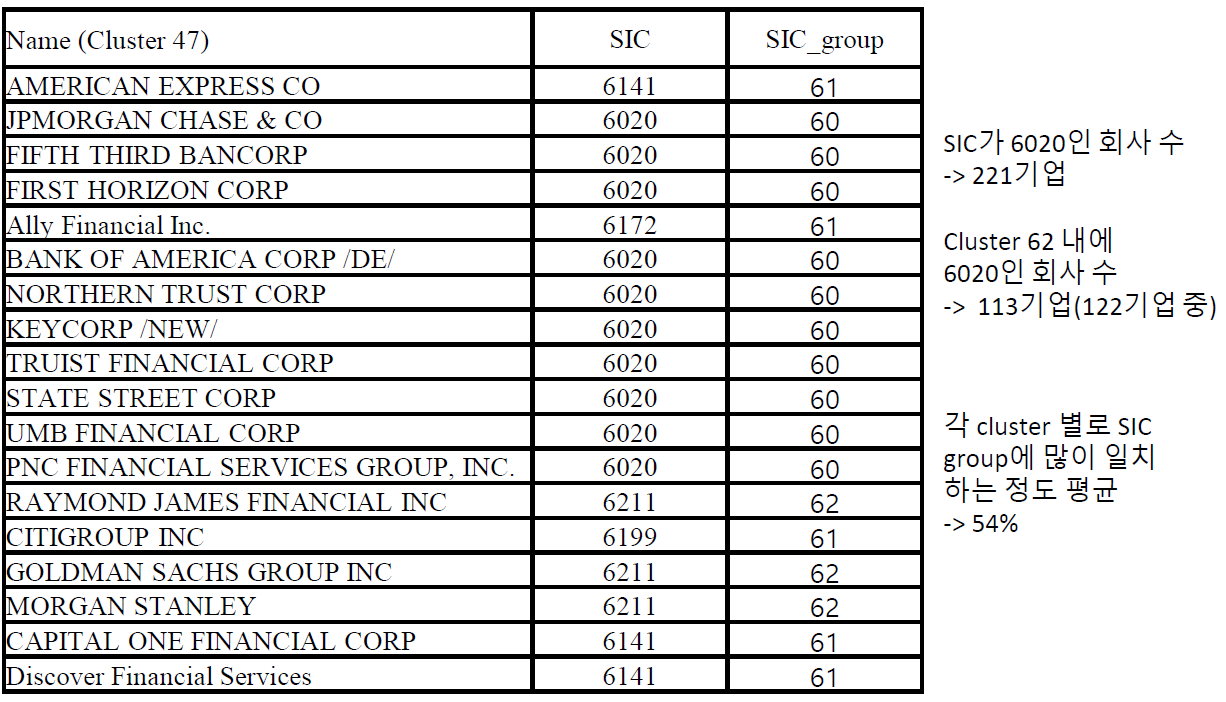 <br>
    위 사진은 cluster 47 집단에 대해서 정리한 표이며, 대부분 Financial 회사들이 이에 속하는 것으로 나타났다.<br>
    전체 표본에서 대표적인 Financial SIC code인 6020인 회사 수가 221기업인데, cluster 62 집단에 속한 122개 기업 중 113개가 SIC가 6020인 것으로 나타났다.

In [54]:
''' 보류, wihtin, across 가 잘 안맞음
df1 = pd.read_csv('groupasset.csv')
df = df1[['fyear', 'gvkey', 'at', 'OI/Sale','OI/asset','NI/Sale','NI/asset' ,'cluster', 'sic_group']].copy()
df['at'] = pd.to_numeric(df['at'], errors='coerce')
df['OI/Sale'] = pd.to_numeric(df['OI/Sale'], errors='coerce')
df['OI/asset'] = pd.to_numeric(df['OI/asset'], errors='coerce')
df['NI/Sale'] = pd.to_numeric(df['NI/Sale'], errors='coerce')
df['NI/asset'] = pd.to_numeric(df['NI/asset'], errors='coerce')

df = df.dropna()

# 각 gvkey 별로 OI/Sale의 가중 평균 계산
def weighted_mean(group, column, weight):
    d = group[column]
    w = group[weight]
    return (d * w).sum() / w.sum()

def weighted_average_std(group, column, weight):
    std_d = group[column].std()
    avg_w = group[weight].mean()
    return std_d * avg_w
# 계산할 컬럼 목록
columns_to_calculate = ['OI/Sale', 'OI/asset', 'NI/Sale', 'NI/asset']

# 각 컬럼에 대한 계산 수행
results = {}

for column in columns_to_calculate:
    # 각 gvkey 별로 컬럼의 가중 평균 계산
    weighted_means_by_gvkey = df.groupby(['fyear', 'gvkey']).apply(weighted_mean, column, 'at')

    # 산업 전반에 걸친 가중 평균의 표준 편차 계산
    across_industry_std = weighted_means_by_gvkey.groupby('fyear').std()

    # 각 cluster 별로 가중 평균된 표준 편차 계산
    weighted_std_by_cluster = df.groupby(['fyear', 'cluster']).apply(weighted_average_std, column, 'at')
    industry_weighted_std = weighted_std_by_cluster.groupby('fyear').mean()
    # 결과 저장
    results[column] = pd.DataFrame({
        column + '_across': across_industry_std,
        column + '_within': industry_weighted_std
    })

# 모든 결과를 하나의 DataFrame으로 결합
final_result = pd.concat(results.values(), axis=1)
'''

<ol>
    <b>6. CFFA </b> <br>
    - CIK를 확보하였기에, 이를 기반으로 Compustat과 결합을 시도하였다. 그 결과 전체 2276기업에서 1702개의 기업으로 표본이 감소하였다. Compustat을 통해 받은 기업 재무 데이터는 data.csv로 저장이 되어 있다. <br>
    - P/S ratio를 추정하기 위해 Compustat 으로 부터 감가상각비, 부동산 매각 ROE, 소득세 등의 데이터를 추출하였다. <br>
    - P/S ratio는 분기별 종가/1주당 매출액으로 계산이 되며, 후에 EV/S ratio (시가총액 + 총 부채 + 현금 및 현금등가물 /1주당 매출액) 역시 고려 가능할 것 이다. <br>
    - 같은 cluster로 peer group이 형성 되었으나, 정확한 추정을 위하여 그 안에서 서로 평균자산이 20% 이내로 차이나는 기업들만 고려하였고, 총 1359개 기업, 415개의 group이 형성이 되게 된다.

In [6]:
import pandas as pd

df = pd.read_csv('data.csv') #분기보고서 기준, 분기별 데이터, 예상치로 데이터 분석하고자함

# datacqtr : 몇년 몇분기
# cik : 각 회사 cik 값
# cluster : 이전에 분류한 cluster(산업? peer그룹?) 집단
# sic_group : sic 3자리 기준으로 나눈 산업집단
# actq : 현재 자산, peer 내에서 자산 비슷한 애들끼리로 분석할 예정
# ceqq : 보통주수
# cshoq : 발행 보통주수 -> 자회사 보통주수 제외
# chq : Cash & Cash equivalent
# ltq : 총 부채
# niq : Net income
# oibdpq : 감가상각비
# saleq : 매출액-> 발행수인 ceqq로 나누어줘야됨
# tstknq : 자사주 보유수
# txtq : 소득세
# ciy : 총포괄손익(net inocme, 매출액 등하고 겹칠듯 하여 안 쓸 예정)
# sppey : Sale of property, 자산매출액?
# mkvaltq : 시가총액
# prccq : 종가

df1 = df[['datacqtr', 'conm', 'cik', 'cluster', 'sic_group', 'actq' ,'prccq', 'saleq', 'cshoq' ,'mkvaltq', 'ltq', 'chq', 'sppey', 'oibdpq', 'niq', 'txtq']].copy()
df1 = df1.dropna(subset=['datacqtr', 'conm', 'cik', 'cluster', 'sic_group', 'actq' , 'prccq', 'saleq', 'cshoq', 'mkvaltq', 'ltq', 'chq', 'niq'])
print('회사 수 : ', len(df1['conm'].unique()))

회사 수 :  1702


### cluster 내에서 평균 자산이 유사한 group으로 형성

In [7]:
clustered = df1.groupby('cluster')

# 각 클러스터 내에서 서브그룹 생성
subgroups = {}
for cluster, group in clustered:
    # conm 별로 평균 actq 계산
    avg_actq = group.groupby('conm')['actq'].mean()

    # 서브그룹 생성
    for name, actq in avg_actq.items():
        lower_bound = actq * 0.8
        upper_bound = actq * 1.2

        # 유사한 actq 값을 가진 다른 conm 찾기
        similar_companies = avg_actq[(avg_actq >= lower_bound) & (avg_actq <= upper_bound) & (avg_actq.index != name)]
        
        # 서브그룹에 추가 (서브그룹 내 다양성 확인)
        if len(similar_companies) > 0:
            subgroups.setdefault(cluster, []).append((name, similar_companies.index.tolist()))



In [8]:
assigned_conms = set()  # 이미 할당된 conm을 추적하기 위한 집합, 집합으로 처리하여 비교할 예정, 할당하는 경우 
cffa_group_id = 1  # CFFA_group ID 시작

for cluster, group in subgroups.items():
    for sub in group:
        conms_in_group = [sub[0]] + sub[1]

        # 아직 할당되지 않은 conm만 처리
        unassigned_conms = [conm for conm in conms_in_group if conm not in assigned_conms] #서브그룹 중 할당 안된 경우 이 집합 안에 들어 있을 예정
        if len(unassigned_conms) > 1:  # 서브그룹에 최소 두 개의 다른 conm이 있어야 함
            # CFFA_group ID 할당
            for conm in unassigned_conms:
                df1.loc[(df1['cluster'] == cluster) & (df1['conm'] == conm), 'CFFA_group'] = cffa_group_id
                assigned_conms.add(conm)  # 할당된 conm 추적

            cffa_group_id += 1

In [9]:
print('할당 안된 회사 수 : ', len(df1[pd.isna(df1['CFFA_group'])]['conm'].unique()))

할당 안된 회사 수 :  357


In [10]:
df2 = df1.dropna(subset = ['CFFA_group']).copy()
print('할당된 회사 수 : ', len(df2['conm'].unique()))
df2 = df2.fillna(0)

할당된 회사 수 :  1345


In [11]:
#EV 생성
df2['EV'] = df2['mkvaltq'] + df2['ltq'] + df2['chq']
# 주당 매출액
df2['SOE'] = df2['saleq']/df2['cshoq']
df2['P/S'] = df2['prccq']/df2['SOE']
df2['EV/S'] = df2['EV']/df2['SOE']
df2['ROE'] = df2['niq']/df2['cshoq']
df2['ROA'] = df2['niq']/df2['actq']


In [13]:
import numpy as np
df2['diffactq'] = df2.groupby('conm')['actq'].diff()
df2['diffsaleq'] = df2.groupby('conm')['saleq'].diff()
df2['diffniq'] = df2.groupby('conm')['niq'].diff()
df2 = df2.dropna(subset = ['diffactq', 'diffsaleq', 'diffniq', 'ROA', 'ROE', 'EV'])
df2 = df2.replace([np.inf, -np.inf], np.nan)
df2 = df2.dropna(subset=['P/S'])

<ol>
    - 각 그룹 내에서 target 회사를 반복문을 통하여 돌아가면서 선정하여 CFFA를 적용한다. 이후 계산된 MAE를 통해 정확도를 보고자 한다. <br>
    허나 weight는 이전에 언급한 것과 같이 다변수 값이 들어가기에 정확한 수치를 추정하기 쉽지 않다. 그렇기에 코사인 유사도를 바탕으로 진행을 하였으며, <br>
    가중치를 해 주기 위해서 peer가 두개 이상인 회사들로만 한정을 하여 분석을 진행하였다. <br>
    $$
X_t = \left[ X_a, X_b, X_c, \ldots \right] \cdot \left[ W_a, W_b, W_c, \ldots \right]^T
$$

$$
P/S_t = \left[P/S_a, P/S_b, P/S_c, \ldots \right] \cdot \left[ W_a, W_b, W_c, \ldots \right]^T
$$
    위의 첫 번째 식과 같이 ROA, ROE, EV, diffactq(자산 변화율), diffsaleq(매출액 변화율), dffniq(순 수익 변화율) 등을 이용하여 $$W_a, W_b, W_c$$ 를 추정하고 <br>
    이를 P/S에 대입하여 target 회사의 P/S를 추정한다.

In [16]:
from sklearn.metrics import mean_absolute_error
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

def caculate_weight_return(target_features, peer_group_features, peer_group_ps):
    similarities = cosine_similarity([target_features], peer_group_features)[0]
    # 가중치 계산 (유사도를 가중치로 사용)
    weights = similarities / np.sum(similarities)
    weighted_ps = np.dot(peer_group_ps, weights)
    return weighted_ps

i=0
result = pd.DataFrame(columns=['cff_group', 'datecqtr', 'mae', 'num_peer'])
for group in df2['CFFA_group'].unique():
    group_data = df2[df2['CFFA_group'] == group]

    #date 별로 반복문
    for datacqtr in group_data['datacqtr'].unique():
        datacqtr_data = group_data[group_data['datacqtr'] == datacqtr]

        actual_ps_values = []
        predicted_ps_values = []

        # 각 분기에서 각 회사별로 반복
        if len(datacqtr_data['conm'].unique()) >3:
            for conm in datacqtr_data['conm'].unique():
                target_company = datacqtr_data[datacqtr_data['conm'] == conm]
                peer_group = datacqtr_data[datacqtr_data['conm'] != conm]

                # 유사도 계산 및 P/S 예측을 위한 필요한 데이터 추출
                target_features = target_company[['ROA', 'ROE', 'EV', 'diffactq', 'diffsaleq', 'diffniq']].iloc[0]
                peer_group_features = peer_group[['ROA', 'ROE', 'EV', 'diffactq', 'diffsaleq', 'diffniq']]
                peer_group_ps = peer_group['P/S']

                # 유사도 계산 및 P/S 예측
                predicted_ps = caculate_weight_return(target_features, peer_group_features, peer_group_ps)

                # 예측된 P/S와 실제 P/S 비교
                actual_ps = target_company['P/S'] 

                actual_ps_values.append(target_company['P/S'])
                predicted_ps_values.append(predicted_ps)

            date_mae = mean_absolute_error(actual_ps_values, predicted_ps_values)
            result.loc[i,'cff_group'] = group
            result.loc[i,'datecqtr'] = datacqtr
            result.loc[i,'mae'] = date_mae
            result.loc[i,'num_peer'] = len(peer_group)
            i+=1
result = result.sort_values(by='mae', axis=0)
result.to_csv('result.csv')

In [17]:
import pandas as pd
result = pd.read_csv('result.csv', index_col=0)
result.head() #각 분기 별 Mae가 낮은 순서대로 정렬한 결과

,cff_group,datecqtr,mae,num_peer
952,152.0,2012Q3,0.189340,3
951,152.0,2012Q2,0.203527,3
1293,405.0,2012Q3,0.225520,4
973,152.0,2018Q1,0.267106,3
1292,405.0,2012Q2,0.295796,4


In [18]:
grouped_result = result.groupby('cff_group')['mae'].mean().sort_values(ascending=True)
print(grouped_result) #각 cff_group의 mae값을 평균내서, mae가 가장 작은 집단을 추정함

cff_group
234.0        1.092813
152.0        1.185571
155.0        1.188335
349.0        1.190547
186.0        1.496244
             ...     
36.0      2293.091490
47.0      2363.789938
390.0     6368.113739
245.0     9601.634005
248.0    12856.672689
Name: mae, Length: 123, dtype: float64


In [19]:
top_5_cff_groups = grouped_result.head(3).index
bottom_5_cff_groups = grouped_result.tail(3).index

top_5_comn = df2[df2['CFFA_group'].isin(top_5_cff_groups)]['conm'].unique()
bottom_5_comn = df2[df2['CFFA_group'].isin(bottom_5_cff_groups)]['conm'].unique()

print("Mae가 낮은 3개의 군집:")
for cff_group in top_5_cff_groups:
    print(f"{cff_group}: {df2[df2['CFFA_group'] == cff_group]['conm'].unique()}")

print("\n Mae가 높은 3개의 군집:")
for cff_group in bottom_5_cff_groups:
    print(f"{cff_group}: {df2[df2['CFFA_group'] == cff_group]['conm'].unique()}")

Mae가 낮은 3개의 군집:
234.0: ['INTERFACE INC' 'ASTEC INDUSTRIES INC' 'WABASH NATIONAL CORP'
 'ENCORE WIRE CORP' 'COMPASS DIVERSIFIED HOLDINGS']
152.0: ['CABOT CORP' 'SPX TECHNOLOGIES INC' 'SONOCO PRODUCTS CO' 'ENERSYS']
155.0: ['FULLER (H. B.) CO' 'ENVIRI CORP' 'LOUISIANA-PACIFIC CORP' 'STEPAN CO'
 'KAISER ALUMINUM CORP' 'DARLING INGREDIENTS INC']

 Mae가 높은 3개의 군집:
390.0: ['PROPHASE LABS INC' 'DELCATH SYSTEMS INC' 'CYTODYN INC' 'ORGENESIS INC']
245.0: ['PROTHENA CORPORATION PLC' 'INTRA-CELLULAR THERAPIES INC' 'INSMED INC'
 'ACADIA PHARMACEUTICALS INC' 'MIRATI THERAPEUTICS INC'
 'AMICUS THERAPEUTICS INC']
248.0: ['GYRE THERAPEUTICS INC' 'ALTIMMUNE INC' 'MOLECULAR TEMPLATES'
 'VAXART INC' 'LUMOS PHARMA INC' 'ALAUNOS THERAPEUTICS INC'
 'CATALYST PHARMACEUTICALS INC' 'ASSEMBLY BIOSCIENCES INC' 'VERASTEM INC']


<ol>
    <b>머신러닝 모델 사용</b> <br>
    코사인 유사도를 통한 P/S 추정 뿐만이 아닌, CFFA의 기본 알고리즘을 바탕으로, 추가 변수로 peer group의 P/S를 추가하여 머신러닝을 통해 예측을 해 보고자 한다. <br>
    시계열 데이터 이기에, 2022년 1분기 이전과 이후로 train/test 를 나누어서 2022년 1분기,2분기,3분기,4분기에 대하여 예측을 진행하며, 이전과 동일하게 가중치들의 합 등으로 표현이 되기 위하여 peer가 두개 이상인 경우로 통일하였다. <br>
    $$ P/S_{i,t} = Peer P/S_{i,t} + Control_{i,t} + P/S_{i,t-1} + P/S_{i,t-2} $$
    위 식과 같은 형태로 peer group의 P/S를 넣어주며 Control은 이전 코사인 유사도에서 사용하였던 기업 변수인 ROA, ROE, EV, diffactq(자산 변화율), diffsaleq(매출액 변화율), dffniq(순 수익 변화율) 이고 <br>
    추가적으로 직전 1,2분기의 P/S ratio도 넣어주었다. 이전과 마찬가지로 MAE를 계산하여 MAE가 훌륭한 group을 알아보았다.

In [20]:
import random

res = pd.DataFrame()

df2['prev_ps_1'] = df2.groupby('conm')['P/S'].shift(1) 
df2['prev_ps_2'] = df2.groupby('conm')['P/S'].shift(2) 
df2 = df2.dropna(subset = ['prev_ps_1', 'prev_ps_2'])

#group 별 회귀
for group in df2['CFFA_group'].unique():
    group_data = df2[df2['CFFA_group'] == group].sort_values('datacqtr')

    #target 회사를 임의로 설정
    if (len(group_data['conm'].unique()) > 3): #group내 peer 가 존재하는 경우만 한정
        for target_conm in group_data['conm'].unique():
            target_data = group_data[group_data['conm'] == target_conm]
            peer_data = group_data[group_data['conm'] != target_conm]
            for conm in peer_data['conm'].unique():
                # 각 peer 회사의 P/S 값을 추출
                peer_ps = peer_data[peer_data['conm'] == conm][['datacqtr', 'P/S']]

                # target_data와 병합을 위해 컬럼 이름 변경
                peer_ps = peer_ps.rename(columns={'P/S': f'peer_ps_{conm}'})

                # target_data와 병합
                target_data = pd.merge(target_data, peer_ps, on='datacqtr', how='left')

            test_start = '2022Q1'
            train_data = target_data[target_data['datacqtr'] < test_start]
            test_data = target_data[target_data['datacqtr'] >= test_start]

            from sklearn.ensemble import RandomForestRegressor
            from sklearn.metrics import mean_squared_error
            import pandas as pd

            train_data = train_data.fillna(0)
            test_data = test_data.fillna(0)

            if(len(test_data) > 0 ) and (len(train_data)>0):
                X_train = train_data[['sppey', 'oibdpq', 'ROE', 'txtq', 'prev_ps_1', 'prev_ps_2'] + [col for col in train_data.columns if 'peer_ps_' in col]]
                y_train = train_data['P/S']

                X_test = test_data[['sppey', 'oibdpq', 'ROE', 'txtq', 'prev_ps_1', 'prev_ps_2'] + [col for col in test_data.columns if 'peer_ps_' in col]]
                y_test = test_data['P/S']

                # 모델 학습
                model = RandomForestRegressor(random_state=42)
                model.fit(X_train, y_train)

                # 모델 검증
                y_pred = model.predict(X_test)
                mae = mean_absolute_error(y_test, y_pred)
                now = pd.DataFrame({'group': [group], 'name': [target_conm], 'mae': [mae]})
                res = pd.concat([res, now])
        
res = res.sort_values(by='mae', axis=0)


In [21]:
res.head()

,group,name,mae
0,96.0,AMCON DISTRIBUTING CO,0.029853
0,83.0,FERRELLGAS PARTNERS -LP,0.036482
0,221.0,CARDINAL HEALTH INC,0.049483
0,307.0,SONIC AUTOMOTIVE INC -CL A,0.075997
0,237.0,SIGMATRON INTERNATIONAL INC,0.077177


In [22]:
grouped_result = res.groupby('group')['mae'].mean().sort_values(ascending=True)
print(grouped_result)

group
99.0         0.229112
97.0         0.343500
234.0        0.428504
186.0        0.548341
152.0        0.571684
             ...     
50.0       614.895404
244.0     1893.292084
36.0      2537.565184
245.0     3364.298231
248.0    20359.156916
Name: mae, Length: 122, dtype: float64


In [23]:
top_5_cff_groups = grouped_result.head(3).index
bottom_5_cff_groups = grouped_result.tail(3).index

top_5_comn = df2[df2['CFFA_group'].isin(top_5_cff_groups)]['conm'].unique()
bottom_5_comn = df2[df2['CFFA_group'].isin(bottom_5_cff_groups)]['conm'].unique()

print("Mae가 낮은 3개의 군집:")
for cff_group in top_5_cff_groups:
    print(f"{cff_group}: {df2[df2['CFFA_group'] == cff_group]['conm'].unique()}")

print("\n Mae가 높은 3개의 군집:")
for cff_group in bottom_5_cff_groups:
    print(f"{cff_group}: {df2[df2['CFFA_group'] == cff_group]['conm'].unique()}")

Mae가 낮은 3개의 군집:
99.0: ['AUTONATION INC' 'PENSKE AUTOMOTIVE GROUP INC' 'WESCO INTL INC'
 'LKQ CORP']
97.0: ['APPLIED INDUSTRIAL TECH INC' 'LANDSTAR SYSTEM INC' 'TITAN MACHINERY INC'
 'QUAD/GRAPHICS INC']
234.0: ['INTERFACE INC' 'ASTEC INDUSTRIES INC' 'WABASH NATIONAL CORP'
 'ENCORE WIRE CORP' 'COMPASS DIVERSIFIED HOLDINGS']

 Mae가 높은 3개의 군집:
36.0: ['HERON THERAPEUTICS INC' 'RIGEL PHARMACEUTICALS INC'
 'LEXICON PHARMACEUTICALS INC' 'CORCEPT THERAPEUTICS INC'
 'CELLDEX THERAPEUTICS INC']
245.0: ['PROTHENA CORPORATION PLC' 'INTRA-CELLULAR THERAPIES INC' 'INSMED INC'
 'ACADIA PHARMACEUTICALS INC' 'MIRATI THERAPEUTICS INC'
 'AMICUS THERAPEUTICS INC']
248.0: ['GYRE THERAPEUTICS INC' 'ALTIMMUNE INC' 'MOLECULAR TEMPLATES'
 'VAXART INC' 'LUMOS PHARMA INC' 'ALAUNOS THERAPEUTICS INC'
 'CATALYST PHARMACEUTICALS INC' 'ASSEMBLY BIOSCIENCES INC' 'VERASTEM INC']


<ol>
    

### - Conclusion

<oi>
    산업 분류 결과 대체로 기존 SIC 보다 세분류 되는 것을 확인할 수 있었다. 허나 기존의 선행연구와 마찬가지로 Across/within std 비교는 하지 못하였기에, 정확도에 대한 의문점은 존재한다. <br>
    기존 CFFA 방식의 weight(W) 계산 뿐만 아니라, 시계열 데이터를 기반으로 한 머신러닝 분석도 진행을 해 보았다. 그 결과 weight 방식에 비해선 전체적인 MAE가 대체적으로 더 낮아지는 것으로 나타났다. <br>
    즉, business description에서 나온 전략적 자원들이 비슷한 기업들로 분류를 하였을 때, 이를 기반으로 peer group을 형성한다면 어느 정도의 기업 가치 추정이 가능하다는 것을 의미하며 <br>
    스타트업 회사, 유니콘 등도 사업 보고서에 기재된 내용을 바탕으로 추정이 가능하게 된다는 것을 의미한다. <br>
    <br>
    <b> 한계 및 개선점 </b><br>
    1. 현재 선행 연구들에 비해서 데이터 셋이 너무 적다. 이는 컴퓨터 성능, 시간 등의 문제가 있기 때문이다.<br>
    2. 현재 랜덤 포레스트 모형에 기반하였으나, 또 다른 머신러닝 기법도 추가적으로 진행하면 좋을 것 이다.<br>
    3. 분류된 산업들에 대한 정확도를 알 수 있는 분석 방법이 필요하다.<br>
    4. 기업 특성 변수를 더 많이 추가하여 엄밀한 분석이 되야 한다.<br>
    5. 다른 텍스트 마이닝 기법 등을 결합하여서, 중요도에 대한 지표를 알 수 있으면 좋을 것 이다.
    6. Business 등 모든 기업에서 쓰이는 공통 단어들이 너무 많이 잡혀 unique 단어로써의 기능을 하지 못한다. 그렇기에 전체 기업에서 50~60% 정도가 겹치는 공통 단어 등을 제외하여 unique 단어를 추출하는 방법 역시 필요하다. <br>
    7. 현재 선행연구와의 차별점이 너무 약하다. 차별을 둘 수 있는 방안에 대해서 고민이 필요하다. <br>
    8. 특정 수 산업 분류가 아닌, 각 회사별로 cosine distance가 가까운 peer 몇 개만을 선정하는 방법 등이 필요해 보인다. 단순 clustering 시, 그 cluster 집단 크기에 대한 의문이 존재하기 때문이다.
    9. 단어 빈도 수가 아닌 전체 문구에서 얼마만큼 나왔는지 등의 ratio 등으로 상위 단어 추출이 필요하다. <br>

### - Reference

<oi>
    조성훈 (2020), "유니콘 기업가치 평가에 대한 논의와 시사점" <br>
    Baldi, P. and Hornik, K. (1989), “Neural networks and principal component analysis: learning from examples without local minima" <br>
    Bowman, Robert G. and Bush, Susan R (2007)., "Using Comparable Companies to Estimate the Betas of Private Companies" <br>
    Chowdhuri, R., Yoon, V.Y., Redmond, R.T. and Etudo, U.O. (2014), “Ontology based integration of XBRL filings for financial decision making” <br>
    Fama, E.F. and French, K.R. (1997), “Industry costs of equity” <br>
    Fang, F., Dutta, K. and Datta, A. (2013), “LDA-based industry classification” <br>
    Hanley, Kathleen, and Gerard Hoberg. 2010. “The Information Content of IPO Prospectuses." <br>
    Hoberg, G. and Phillips, G. (2016), “Text-based network industries and endogenous product differentiation” <br>
    Kang, Hyoung Goo (2021), "Strategically Comparable Firm-Finding Algorithm (CFFA): A Strategic Management Approach to Valuation" <br>
    Kim, D., Kang, H.-G., Bae, K. and Jeon, S. (2022), "An artificial intelligence-enabled industry classification and its interpretation" <br>
    Radovanovic, M., Nanopoulos, A. and Ivanovic, M. (2010), “On the existence of obstinate results in vector space models" <br>
    Strehl, A., Ghosh, J. and Mooney, R. (2000), “Impact of similarity measures on web-page clustering” <br>
    Stulman, A. H. (2020). "EMERGE-ing comparable companies valuation analysis." <br>
    Xu, X., Qian, H., Ge, C. and Lin, Z. (2020), “Industry classification with online resume big data: a design science approach” <br>
    Yang, S.Y., Liu, F.-C., Zhu, X. and Yen, D.C. (2019), “A graph mining approach to identify financial reporting patterns: an empirical examination of industry classifications” <br>